<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Evaluating-closure-―-Kossinets-&amp;-Watts'-procedure" data-toc-modified-id="Evaluating-closure-―-Kossinets-&amp;-Watts'-procedure-1">Evaluating closure ― Kossinets &amp; Watts' procedure</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2">Preparation</a></span><ul class="toc-item"><li><span><a href="#Step1:" data-toc-modified-id="Step1:-2.1">Step1:</a></span></li><li><span><a href="#Step-2:" data-toc-modified-id="Step-2:-2.2">Step 2:</a></span></li><li><span><a href="#Step-3:" data-toc-modified-id="Step-3:-2.3">Step 3:</a></span></li><li><span><a href="#Step-4:" data-toc-modified-id="Step-4:-2.4">Step 4:</a></span></li></ul></li><li><span><a href="#Run-the-algorithm-on-the-whole-dataset-using-rolling-basis" data-toc-modified-id="Run-the-algorithm-on-the-whole-dataset-using-rolling-basis-3">Run the algorithm on the whole dataset using rolling basis</a></span></li></ul></div>

# Evaluating closure ― Kossinets & Watts' procedure

- We take two snapshots of the network at different times.
- For each $k$, we identify all pairs of nodes who have exactly $k$ friends in common in the first snapshot, but who are not directly connected by an edge
- We define $T(k)$ to be the fraction of these pairs that have formed an edge by the time of the second snapshot. This is our empirical estimate for the probability that a link will form between two people with $k$ friends in common.
- We plot $T(k)$ as a function of $k$ to illustrate the effect of common friends on the formation of links.

# Preparation

In [1]:
# import relevant lib
import math
import pprint
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# remove false-positive warning (chain_assignment)
pd.set_option('mode.chained_assignment', None)

In [2]:
# load data
data = pd.read_csv('email-Eu-core-temporal.txt', sep = ' ', names = ['source', 'target', 'timestamp'])
data

,source,target,timestamp
0,582,364,0
1,168,472,2797
2,168,912,3304
3,2,790,4523
4,2,322,7926
...,...,...,...
332329,324,367,45401817
332330,790,126,45402441
332331,790,126,45403709
332332,782,126,45404903


## Step1:
- We take two snapshots of the network at different times.

In [3]:
# before snapshot: at timestamp < 8640000 (100days) 
snap1 = data[data['timestamp'] < 8640000]

# sort by source, target
snap1.sort_values(by = ['source', 'target'], ascending = True, inplace = True)
snap1

,source,target,timestamp
49502,0,6,8167849
50211,0,6,8245817
1911,0,118,212684
49322,0,470,8157065
38823,0,732,6689158
...,...,...,...
37660,1004,977,5583912
42080,1004,977,7048494
48764,1004,977,8083620
49916,1004,977,8237184


In [4]:
# after snapshot: 200 days data (+100days from the first snap) 
snap2 = data[data['timestamp'] < 8640000*2]

# sort by source, target
snap2.sort_values(by = ['source', 'target'], ascending = True, inplace = True)
snap2

,source,target,timestamp
49502,0,6,8167849
50211,0,6,8245817
69562,0,6,11172035
74464,0,6,11777490
78755,0,6,12381593
...,...,...,...
92527,1004,977,14135391
103583,1004,977,15756668
103674,1004,977,15757958
105546,1004,977,15870940


## Step 2:
- For each $k$, we identify all pairs of nodes who have exactly $k$ friends in common in the first snapshot, but who are not directly connected by an edge

In [ ]:
"""
Example of designed nested dictionary  
{ `0` : { `1` : [10, 11, 15], <-  num_mutual : [list of nodes]
          `0` : [5, 8, 12],
              :
              :
              :
        }  
  `1` : { `1` : [3, 9], <-  num_mutual : [list of nodes]
          `2` :  [5],
              :
              :
              :
        }
}
"""

In [6]:
# get all nodes in the snap
snap = snap1
print('snap:\n', snap.head(), '\n')

source_set = set(snap['source'])
target_set = set(snap['target'])
node_list = list(set(snap['source']).union(set(snap['target'])))
print('node_list:\n',node_list)
print(len(node_list))

snap:
        source  target  timestamp
49502       0       6    8167849
50211       0       6    8245817
1911        0     118     212684
49322       0     470    8157065
38823       0     732    6689158 

node_list:
 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 82, 83, 84, 86, 87, 90, 91, 92, 95, 96, 97, 98, 101, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 124, 125, 126, 127, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 157, 158, 159, 160, 161, 164, 165, 166, 167, 168, 170, 171, 173, 174, 175, 176, 179, 180, 181, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 214, 215, 216, 217, 218, 219, 2

In [7]:
# get dictionary of nodes (keys) and their ties (values)
# {`node` : [list of nodes it has interacted with],...}
structure = {}
for node in node_list:
    if node in snap['source']:
        set1 = set(snap[snap['source'] == node]['target'].unique())
    if node in snap['target']:
        set2 = set(snap[snap['target'] == node]['source'].unique())
    to_append = list(set.union(set1, set2))
    structure[node] = to_append
pp = pprint.PrettyPrinter(width=100, compact=True)
pp.pprint(structure)

{0: [32, 249, 6, 330, 333, 752, 118, 470, 790, 569, 732, 605],
 1: [323, 324, 548, 106, 303, 309, 310, 343],
 2: [769, 516, 782, 272, 17, 787, 532, 790, 283, 540, 38, 812, 814, 52, 313, 58, 61, 322, 66, 840,
     586, 75, 77, 846, 335, 849, 344, 602, 868, 112, 628, 629, 119, 891, 126, 389, 135, 664, 923,
     416, 167, 168, 700, 956, 969, 715, 465, 977, 983, 231, 236, 749, 499, 500, 248],
 4: [771, 135, 456, 585, 720, 405, 214, 159, 362, 304, 371, 441, 700],
 5: [772, 135, 275, 532, 670, 808, 553, 175, 78, 335, 724, 980, 732, 605, 607, 609, 362, 107, 491,
     246, 506, 381],
 6: [0, 772, 75, 333, 783, 470, 410, 732, 670, 159, 249, 1004, 881, 381, 189, 248, 569, 506, 61],
 7: [418],
 8: [544, 739, 422, 809, 143, 144, 563, 915, 696, 90, 731, 159],
 9: [166],
 10: [506, 381],
 11: [633, 923, 662, 617, 619, 334],
 12: [704, 422, 870, 680, 362, 720, 405, 406, 731],
 13: [704, 516, 837, 772, 14, 719, 783, 850, 532, 923, 738, 743, 682, 173, 239, 437, 506],
 14: [131, 516, 644, 650, 13, 270, 

 161: [159, 193, 771, 936, 586, 239, 692, 214, 951, 890, 571, 863],
 164: [322, 649, 402, 788, 853, 223, 420, 548, 740, 103, 174, 879, 368, 638],
 165: [257, 647, 136, 264, 267, 141, 142, 17, 274, 401, 915, 920, 31, 543, 422, 552, 424, 683, 428,
       302, 948, 952, 953, 316, 190, 65, 67, 838, 454, 200, 586, 75, 971, 207, 847, 344, 857, 858,
       92, 990, 629],
 166: [515, 772, 517, 648, 9, 782, 912, 30, 416, 674, 290, 294, 168, 52, 53, 185, 573, 447, 74, 586,
       845, 984, 602, 91, 609, 356, 868, 743, 232, 112, 240, 883, 500, 759, 120, 762, 765, 126],
 167: [512, 2, 141, 274, 658, 280, 24, 795, 159, 35, 547, 421, 424, 552, 301, 942, 817, 954, 188,
       957, 585, 716, 718, 207, 978, 851, 469, 90, 988, 862, 607, 614, 362, 630, 891, 383],
 168: [2, 260, 133, 134, 648, 912, 915, 790, 30, 416, 166, 45, 557, 305, 52, 948, 439, 313, 575, 66,
       324, 966, 585, 586, 77, 845, 472, 984, 90, 347, 602, 607, 356, 868, 743, 232, 362, 369, 500,
       885, 762, 765, 126],
 170: [32, 581, 

 343: [1, 388, 399, 402, 534, 663, 159, 427, 939, 303, 53, 310, 822, 950, 61, 322, 706, 324, 587,
       84, 853, 214, 735, 223, 993, 607, 612, 229, 740, 368, 505],
 344: [2, 67, 838, 200, 971, 142, 915, 857, 543, 165, 373, 952, 316],
 346: [559],
 347: [577, 966, 715, 590, 147, 277, 90, 157, 926, 933, 168, 171, 748, 686, 308],
 350: [231],
 353: [391, 373, 185, 891, 957, 190],
 355: [308, 933, 686],
 356: [256, 515, 260, 517, 772, 782, 528, 530, 535, 30, 542, 290, 294, 550, 305, 52, 313, 569, 61,
       573, 574, 65, 586, 77, 334, 591, 845, 854, 90, 602, 859, 607, 868, 104, 617, 112, 629, 120,
       126, 648, 912, 915, 157, 159, 416, 927, 166, 168, 684, 687, 704, 450, 462, 718, 209, 472,
       984, 743, 499, 500, 502, 505, 762, 765],
 359: [249, 236, 159],
 360: [264, 526, 530, 658, 280, 24, 90, 160, 547, 170, 493, 569, 561, 629, 631, 696, 697, 891],
 361: [226, 789, 90, 987, 540],
 362: [514, 4, 5, 517, 135, 765, 12, 141, 526, 909, 528, 659, 663, 280, 922, 415, 672, 547, 421,
     

       700, 65, 449, 450, 586, 334, 462, 718, 851, 214, 120, 607, 356, 742, 360, 746, 493, 749, 633,
       629, 630, 631, 248, 377, 502, 891],
 531: [641, 769, 135, 75, 659, 789, 214, 90, 987, 159, 95, 482, 994, 306, 56, 383],
 532: [2, 898, 516, 5, 650, 13, 270, 783, 790, 537, 29, 670, 804, 808, 553, 812, 175, 688, 820, 437,
       700, 828, 192, 837, 335, 850, 738, 1001, 491, 107, 881, 118, 761, 506, 381],
 533: [771, 742],
 534: [772, 290, 546, 38, 550, 42, 562, 310, 61, 64, 65, 322, 324, 843, 334, 591, 84, 343, 90, 607,
       612, 102, 622, 879, 120, 890, 125, 638, 388, 135, 649, 139, 402, 663, 154, 159, 939, 174,
       692, 206, 477, 223, 735, 487, 489, 746, 749, 505, 510],
 535: [513, 772, 646, 542, 159, 927, 556, 684, 53, 823, 444, 62, 586, 75, 462, 722, 854, 472, 356,
       113, 369, 499, 500, 250, 124],
 537: [737, 107, 236, 335, 208, 532, 440, 506, 381],
 538: [333, 78, 239, 724, 693, 502, 951, 470, 569, 862],
 539: [332],
 540: [641, 2, 135, 789, 796, 925, 290, 546, 422,

 658: [647, 136, 267, 142, 143, 526, 656, 274, 530, 915, 280, 408, 24, 31, 160, 35, 547, 167, 424,
       428, 301, 561, 817, 953, 188, 838, 207, 731, 92, 990, 870, 360, 493, 629, 631, 891],
 659: [769, 771, 585, 718, 531, 660, 159, 229, 742, 233, 362, 306, 307, 374, 61, 830],
 660: [771, 772, 134, 329, 75, 783, 528, 784, 659, 90, 159, 607, 749, 239, 306, 692, 951, 568],
 661: [75, 812],
 662: [900, 267, 11, 272, 790, 152, 26, 546, 802, 40, 430, 947, 695, 568, 187, 443, 60, 572, 61,
       193, 450, 198, 838, 712, 466, 596, 86, 214, 90, 488, 239, 112, 250, 379],
 663: [898, 322, 706, 69, 649, 395, 591, 84, 534, 343, 410, 90, 223, 612, 103, 42, 362, 303, 879,
       501, 950, 571, 509, 638],
 664: [737, 2, 107, 335, 790, 380],
 669: [32, 544, 290, 739, 580, 809, 844, 48, 791, 159],
 670: [643, 5, 6, 517, 783, 532, 923, 157, 29, 542, 808, 553, 173, 175, 687, 688, 692, 185, 702,
       449, 450, 75, 334, 335, 462, 591, 718, 851, 724, 605, 223, 742, 107, 236, 248, 249, 506,
       381],
 6

 890: [776, 915, 147, 534, 280, 923, 798, 927, 161, 546, 38, 40, 427, 948, 951, 569, 190, 193, 454,
       714, 75, 716, 338, 214, 731, 220, 607, 609, 997, 230, 233, 235, 1003, 880, 627, 500, 629,
       502],
 891: [2, 775, 267, 141, 526, 656, 274, 530, 658, 790, 280, 24, 920, 414, 159, 32, 160, 290, 543,
       167, 685, 687, 561, 700, 190, 65, 846, 851, 214, 607, 353, 360, 493, 629, 630, 631],
 893: [509],
 894: [629],
 896: [724, 281, 861],
 897: [327],
 898: [385, 808, 553, 107, 685, 335, 464, 688, 532, 663, 90, 29],
 900: [450, 835, 196, 712, 272, 214, 662, 90, 607, 802, 742, 40, 187, 692, 568, 571, 61],
 901: [769, 771, 83, 790, 863, 223, 993, 229, 742, 233, 749, 53, 502, 830, 703],
 904: [90, 718, 337, 410, 127, 189, 479],
 905: [281],
 907: [393, 426, 587, 843, 687, 883, 127],
 909: [672, 581, 585, 362, 528, 58, 383],
 910: [65, 193, 609, 835, 231, 329, 591, 272, 692, 571, 923, 607],
 911: [1004],
 912: [260, 772, 915, 790, 923, 30, 159, 416, 166, 168, 557, 305, 52, 439, 313, 

In [8]:
# preparation to create a nested dictionary
nested_dict = {}

# loop over all the nodes
for source in node_list:
    temp_dict = {}
    for target in node_list:
        # to avoid duplicated data, only compute the cases where target > source
        if target > source:
            # if there is no edge between the two nodes
            if target not in structure[source]:
                # calculate mutual ties
                num_mutual = len(set.intersection(set(structure[source]), set(structure[target])))
                # add the info to `temp_dict`
                if num_mutual in temp_dict.keys():
                    temp_dict[num_mutual].append(target)
                else: 
                    temp_dict[num_mutual] = [target]

    # store `temp_dict` in `nested_dict`            
    nested_dict[source] = temp_dict   

In [9]:
pp.pprint(nested_dict)

{0: {0: [1, 4, 7, 8, 9, 10, 11, 12, 13, 15, 23, 25, 26, 27, 28, 30, 34, 35, 36, 39, 41, 42, 44, 46,
         49, 50, 56, 58, 59, 60, 62, 64, 67, 68, 69, 71, 72, 73, 74, 76, 77, 79, 82, 83, 84, 86, 87,
         91, 92, 95, 96, 97, 98, 101, 102, 103, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116,
         117, 122, 124, 125, 131, 132, 133, 134, 136, 137, 138, 139, 141, 142, 144, 145, 146, 147,
         148, 150, 151, 152, 153, 154, 157, 160, 161, 164, 165, 166, 167, 171, 173, 174, 175, 176,
         179, 180, 181, 186, 187, 190, 192, 194, 195, 198, 199, 200, 201, 202, 203, 205, 206, 207,
         208, 209, 215, 216, 217, 218, 219, 221, 223, 227, 230, 232, 239, 240, 241, 242, 243, 245,
         246, 250, 251, 252, 254, 255, 256, 257, 259, 263, 264, 268, 269, 270, 272, 273, 274, 275,
         276, 277, 283, 284, 285, 291, 292, 297, 299, 301, 302, 303, 304, 305, 307, 308, 309, 310,
         311, 313, 316, 317, 319, 320, 321, 323, 324, 325, 326, 327, 329, 331, 332, 337, 338, 341,
        

     5: [32, 45, 147, 165, 196, 220, 232, 383, 447, 534, 550, 581, 633, 650, 684, 720, 761, 762,
         764, 890, 921, 1001],
     6: [53, 107, 185, 260, 280, 306, 410, 472, 502, 546, 569, 573, 591, 670, 742, 746, 783, 885,
         951, 984, 987],
     7: [189, 256, 290, 338, 364, 415, 462, 506, 517, 530, 648],
     8: [294, 450, 765],
     9: [30, 267, 692, 718, 743],
     10: [166, 687, 772, 912, 915],
     11: [65, 334, 948],
     12: [120, 214],
     13: [193],
     14: [90, 159, 607],
     15: [356]},
 4: {0: [7, 9, 10, 11, 13, 14, 15, 16, 19, 23, 24, 26, 27, 28, 31, 35, 36, 39, 41, 42, 44, 45, 46,
         48, 49, 50, 52, 59, 60, 64, 66, 67, 68, 69, 71, 73, 74, 76, 77, 78, 79, 84, 87, 91, 92, 96,
         98, 101, 102, 103, 104, 105, 106, 110, 113, 115, 117, 118, 122, 124, 125, 131, 132, 134,
         138, 139, 144, 145, 146, 148, 150, 153, 154, 158, 164, 165, 166, 171, 173, 174, 175, 179,
         180, 181, 185, 186, 191, 192, 194, 195, 196, 198, 199, 202, 203, 205, 206, 207,

 6: {0: [7, 9, 11, 12, 15, 17, 23, 25, 26, 27, 28, 30, 34, 35, 36, 39, 41, 42, 44, 45, 46, 48, 50,
         52, 58, 59, 60, 64, 66, 67, 69, 71, 73, 74, 76, 77, 79, 83, 84, 86, 87, 92, 95, 96, 97, 98,
         101, 102, 103, 104, 105, 106, 110, 111, 112, 113, 115, 117, 119, 124, 125, 126, 132, 133,
         134, 137, 138, 139, 141, 144, 145, 146, 148, 149, 151, 152, 154, 164, 168, 170, 171, 174,
         176, 179, 180, 187, 194, 195, 197, 198, 202, 203, 205, 206, 207, 215, 216, 217, 219, 221,
         227, 232, 240, 241, 242, 245, 246, 250, 253, 254, 255, 256, 259, 260, 263, 264, 267, 268,
         269, 273, 275, 276, 277, 284, 285, 291, 294, 297, 299, 301, 302, 303, 304, 305, 308, 309,
         310, 311, 313, 317, 318, 319, 321, 322, 323, 325, 331, 332, 337, 341, 344, 346, 347, 350,
         353, 355, 361, 366, 368, 369, 370, 372, 373, 374, 375, 378, 379, 382, 385, 386, 389, 391,
         392, 394, 395, 396, 397, 399, 400, 401, 402, 405, 407, 408, 411, 418, 420, 421, 423, 424,
        

 8: {0: [9, 10, 11, 13, 16, 19, 23, 25, 26, 27, 28, 34, 35, 36, 39, 41, 42, 44, 45, 46, 48, 49, 50,
         52, 58, 59, 60, 64, 66, 67, 68, 69, 71, 73, 74, 76, 77, 78, 79, 82, 83, 84, 86, 87, 91, 95,
         96, 97, 98, 101, 102, 103, 105, 106, 110, 111, 113, 115, 117, 118, 119, 125, 126, 131, 132,
         133, 137, 138, 139, 141, 145, 146, 148, 149, 150, 151, 152, 153, 154, 158, 164, 166, 170,
         171, 174, 176, 179, 180, 181, 184, 186, 187, 192, 194, 195, 196, 197, 198, 202, 203, 206,
         207, 208, 215, 217, 218, 219, 221, 227, 228, 229, 231, 232, 235, 240, 241, 242, 243, 245,
         246, 249, 250, 252, 253, 254, 255, 256, 257, 259, 260, 263, 264, 267, 269, 273, 275, 276,
         277, 291, 293, 294, 295, 297, 299, 301, 303, 304, 305, 308, 309, 310, 311, 313, 317, 318,
         319, 320, 321, 322, 323, 325, 326, 327, 329, 330, 331, 332, 333, 335, 337, 338, 339, 341,
         346, 350, 353, 355, 365, 366, 368, 369, 370, 372, 373, 374, 375, 378, 379, 380, 382, 383,
     

          235, 240, 241, 242, 243, 245, 246, 250, 253, 254, 255, 256, 257, 259, 260, 263, 264, 267,
          268, 269, 272, 273, 274, 275, 276, 277, 278, 280, 281, 283, 284, 285, 290, 291, 292, 293,
          294, 295, 297, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313, 316, 317,
          318, 319, 321, 322, 323, 324, 325, 326, 329, 330, 331, 332, 334, 337, 338, 339, 341, 343,
          344, 346, 347, 350, 353, 355, 356, 359, 360, 361, 365, 366, 368, 369, 370, 371, 372, 373,
          374, 375, 378, 379, 382, 383, 385, 386, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398,
          399, 400, 401, 402, 405, 406, 407, 408, 410, 411, 415, 416, 418, 420, 421, 422, 423, 424,
          426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 438, 439, 441, 443, 444, 446, 447,
          448, 449, 450, 452, 453, 454, 456, 457, 458, 459, 460, 462, 464, 465, 466, 467, 468, 469,
          470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 483, 485, 487, 488, 489, 492,


 14: {0: [15, 17, 19, 23, 24, 25, 26, 27, 28, 34, 35, 36, 41, 42, 44, 45, 46, 48, 49, 50, 52, 58,
          59, 60, 62, 64, 66, 67, 69, 71, 72, 73, 74, 76, 77, 79, 82, 83, 84, 86, 87, 92, 96, 97,
          98, 102, 105, 110, 111, 113, 115, 116, 117, 119, 125, 126, 133, 136, 137, 141, 145, 146,
          147, 148, 149, 150, 152, 154, 157, 161, 164, 165, 166, 170, 171, 174, 176, 179, 180, 187,
          188, 190, 194, 195, 198, 202, 203, 206, 207, 209, 217, 218, 219, 221, 227, 228, 229, 230,
          232, 240, 241, 242, 243, 245, 250, 254, 255, 256, 259, 260, 263, 264, 267, 269, 272, 273,
          274, 275, 276, 277, 283, 284, 285, 291, 294, 295, 297, 299, 301, 302, 304, 305, 308, 309,
          310, 311, 313, 316, 317, 318, 319, 321, 322, 323, 324, 325, 326, 330, 331, 332, 337, 338,
          339, 341, 343, 344, 346, 350, 353, 355, 359, 366, 368, 369, 370, 371, 372, 373, 374, 375,
          378, 379, 385, 386, 389, 391, 392, 393, 394, 395, 397, 398, 399, 400, 401, 402, 405, 406,
     

          263, 268, 269, 270, 273, 275, 276, 284, 291, 295, 297, 299, 303, 304, 305, 307, 308, 309,
          310, 311, 317, 318, 319, 320, 323, 325, 326, 327, 329, 330, 331, 333, 338, 339, 341, 343,
          346, 347, 350, 353, 355, 359, 360, 361, 364, 365, 366, 368, 370, 372, 373, 374, 375, 378,
          379, 380, 381, 382, 385, 386, 391, 393, 394, 395, 396, 397, 398, 399, 400, 402, 404, 405,
          406, 407, 409, 411, 414, 415, 418, 420, 421, 423, 426, 427, 429, 430, 431, 432, 433, 434,
          436, 437, 438, 439, 440, 441, 442, 446, 447, 448, 449, 452, 453, 456, 457, 460, 461, 464,
          466, 467, 468, 470, 471, 473, 474, 475, 476, 477, 479, 481, 482, 483, 485, 487, 488, 489,
          491, 492, 493, 495, 497, 501, 504, 505, 506, 508, 509, 510, 511, 512, 513, 514, 515, 520,
          522, 523, 524, 527, 531, 533, 534, 535, 537, 538, 539, 541, 544, 547, 548, 549, 551, 553,
          554, 556, 557, 558, 559, 562, 563, 564, 565, 566, 571, 572, 573, 574, 575, 576, 578, 580,


      1: [58, 65, 74, 111, 120, 126, 133, 157, 159, 160, 161, 165, 166, 168, 185, 196, 214, 248,
          256, 264, 267, 294, 310, 334, 356, 383, 416, 435, 447, 450, 462, 479, 499, 500, 517, 530,
          535, 541, 557, 573, 602, 607, 648, 655, 684, 687, 692, 696, 718, 743, 752, 762, 765, 772,
          782, 803, 854, 868, 885, 912, 915, 947, 948, 984]},
 24: {0: [25, 26, 27, 28, 29, 30, 34, 36, 38, 39, 41, 42, 44, 45, 46, 48, 49, 50, 52, 58, 59, 60,
          62, 64, 66, 68, 69, 71, 72, 73, 74, 76, 77, 79, 83, 84, 86, 95, 96, 97, 98, 101, 102, 103,
          104, 105, 106, 107, 110, 111, 113, 115, 116, 117, 118, 119, 124, 125, 126, 131, 132, 133,
          137, 138, 139, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 158, 161, 164, 166, 168,
          171, 174, 175, 176, 179, 180, 191, 192, 194, 195, 198, 199, 203, 205, 206, 208, 209, 215,
          216, 217, 218, 219, 221, 223, 226, 227, 230, 232, 235, 240, 242, 243, 245, 246, 250, 251,
          252, 253, 254, 255, 259, 260, 26

          246, 248, 249, 251, 252, 253, 255, 256, 257, 259, 260, 263, 264, 268, 269, 270, 273, 274,
          275, 276, 277, 278, 280, 281, 283, 284, 285, 291, 292, 293, 294, 295, 297, 301, 302, 303,
          304, 305, 306, 307, 308, 309, 310, 311, 313, 316, 317, 318, 319, 320, 321, 322, 323, 324,
          325, 326, 327, 329, 330, 331, 332, 333, 335, 337, 338, 339, 341, 343, 344, 346, 347, 350,
          353, 355, 356, 359, 360, 361, 362, 364, 365, 366, 368, 369, 370, 371, 372, 373, 374, 375,
          377, 378, 381, 382, 385, 386, 388, 389, 391, 392, 393, 394, 395, 396, 397, 399, 400, 401,
          402, 404, 405, 406, 407, 408, 409, 410, 411, 414, 416, 418, 420, 421, 422, 423, 424, 426,
          427, 429, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 444, 446, 447, 448,
          449, 452, 453, 456, 457, 458, 459, 460, 461, 462, 464, 465, 467, 468, 469, 470, 472, 473,
          474, 475, 476, 477, 478, 479, 481, 482, 483, 485, 487, 489, 491, 492, 493, 495, 497, 500,


          527, 528, 530, 532, 533, 534, 535, 537, 538, 539, 541, 542, 543, 544, 546, 547, 548, 549,
          550, 551, 552, 553, 554, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 568, 571, 572,
          573, 574, 575, 576, 577, 578, 580, 581, 584, 585, 586, 589, 590, 592, 593, 594, 595, 596,
          597, 599, 602, 603, 606, 609, 612, 613, 614, 616, 617, 618, 619, 622, 626, 627, 628, 629,
          630, 631, 634, 637, 638, 639, 640, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654,
          655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 669, 670, 671, 672, 673, 674, 676, 678,
          679, 680, 681, 682, 683, 684, 685, 686, 688, 690, 693, 694, 695, 696, 697, 699, 700, 701,
          702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 718, 720, 722,
          723, 724, 727, 729, 732, 734, 735, 737, 739, 740, 741, 742, 743, 745, 747, 748, 752, 753,
          754, 758, 759, 761, 762, 765, 767, 770, 771, 773, 774, 775, 776, 777, 779, 780, 782, 783,


          968, 969, 970, 971, 972, 975, 976, 979, 983, 985, 986, 988, 990, 991, 993, 994, 995, 1002,
          1003, 1004],
      1: [38, 62, 76, 82, 97, 106, 107, 110, 122, 124, 137, 142, 147, 160, 161, 173, 187, 189, 196,
          197, 199, 200, 205, 216, 220, 223, 226, 231, 233, 240, 264, 268, 270, 306, 324, 326, 329,
          333, 338, 353, 360, 361, 369, 377, 381, 388, 422, 428, 433, 435, 449, 456, 458, 464, 466,
          469, 479, 485, 493, 505, 516, 526, 541, 551, 553, 554, 556, 561, 564, 565, 574, 577, 587,
          594, 595, 612, 613, 614, 626, 628, 633, 644, 646, 647, 650, 657, 660, 663, 687, 693, 694,
          695, 697, 699, 702, 731, 732, 752, 761, 763, 771, 783, 784, 791, 802, 808, 812, 817, 832,
          834, 841, 843, 844, 846, 857, 862, 865, 870, 880, 883, 889, 898, 900, 904, 909, 922, 924,
          935, 939, 940, 951, 952, 956, 966, 973, 977, 978, 996, 997, 1001],
      2: [32, 40, 45, 66, 72, 74, 91, 134, 167, 170, 176, 186, 201, 236, 280, 337, 341, 347, 364,
 

          990, 1004],
      6: [40, 122, 141, 231, 272, 493, 540, 542, 546, 631, 712, 742, 749, 866, 980],
      7: [56, 75, 142, 274, 281, 360, 362, 422, 544, 586, 647, 783, 890],
      8: [107, 157, 193, 333, 506, 630, 658, 670, 720, 923],
      9: [167, 248, 356, 450, 470, 951, 987],
      10: [595, 605, 609, 692, 724],
      11: [377, 462],
      12: [120, 135, 334, 410, 746],
      13: [160, 629],
      15: [65],
      16: [290, 772],
      18: [61, 607]},
 34: {0: [35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 58, 59, 60, 62, 64, 66, 67, 68,
          69, 71, 73, 74, 76, 77, 78, 79, 83, 84, 86, 87, 91, 92, 96, 98, 101, 102, 103, 104, 105,
          106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 124, 125, 126, 127, 131,
          132, 133, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
          154, 160, 164, 165, 166, 167, 168, 171, 173, 174, 175, 179, 180, 181, 184, 186, 187, 188,
          189, 190, 192, 194, 195, 19

          553, 554, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 568, 569, 571, 572, 573, 574,
          575, 576, 577, 578, 580, 581, 582, 584, 585, 586, 587, 588, 589, 590, 593, 594, 595, 596,
          597, 599, 602, 603, 605, 606, 607, 612, 613, 614, 616, 618, 619, 622, 624, 626, 627, 628,
          629, 630, 631, 634, 637, 638, 639, 640, 641, 643, 645, 646, 647, 648, 649, 652, 653, 654,
          655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 669, 671, 672, 673, 674, 676, 678, 679,
          681, 682, 683, 684, 685, 686, 688, 690, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702,
          703, 704, 705, 706, 708, 709, 710, 711, 712, 714, 716, 718, 720, 722, 723, 724, 727, 729,
          731, 732, 734, 735, 736, 737, 739, 740, 741, 742, 745, 747, 748, 749, 752, 753, 754, 758,
          759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 773, 774, 775, 776, 777, 779, 780, 784,
          787, 788, 789, 790, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803, 804, 807, 808, 809,


          327, 329, 330, 331, 332, 333, 335, 338, 339, 341, 344, 346, 347, 350, 353, 355, 356, 359,
          360, 361, 364, 365, 366, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379, 380, 381, 382,
          383, 385, 386, 389, 391, 392, 393, 394, 396, 397, 398, 400, 401, 404, 405, 406, 407, 408,
          409, 411, 414, 415, 416, 418, 421, 422, 423, 424, 426, 428, 429, 430, 431, 432, 433, 434,
          435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 446, 447, 448, 449, 450, 452, 453, 456,
          457, 458, 459, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 475, 476, 478,
          479, 481, 482, 483, 485, 488, 491, 492, 493, 495, 497, 499, 500, 502, 504, 506, 508, 511,
          512, 513, 514, 515, 516, 517, 519, 520, 522, 523, 526, 527, 528, 530, 531, 532, 533, 535,
          537, 538, 539, 540, 541, 542, 543, 544, 547, 549, 551, 552, 553, 554, 556, 557, 558, 559,
          561, 563, 564, 565, 566, 568, 569, 572, 573, 574, 575, 576, 577, 578, 580, 581, 582, 584,


          873, 875, 876, 877, 879, 880, 882, 883, 884, 886, 887, 889, 890, 893, 894, 896, 897, 898,
          900, 904, 905, 907, 909, 910, 911, 916, 918, 920, 921, 922, 924, 925, 926, 927, 930, 931,
          933, 934, 935, 936, 938, 939, 940, 942, 944, 945, 946, 947, 950, 951, 952, 953, 954, 955,
          957, 958, 960, 963, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 983,
          985, 987, 988, 990, 991, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004],
      1: [48, 65, 74, 90, 119, 133, 134, 149, 193, 201, 229, 236, 250, 267, 294, 306, 324, 332, 335,
          347, 362, 369, 388, 435, 439, 448, 458, 465, 475, 516, 519, 532, 557, 585, 595, 607, 628,
          630, 648, 662, 664, 680, 700, 743, 761, 762, 812, 823, 845, 881, 885, 891, 901, 915, 923,
          956, 986],
      2: [232, 260, 305, 313, 472, 575, 586, 602, 765, 868, 948, 984],
      3: [77, 166, 356, 416, 500, 912, 966],
      4: [126]},
 46: {0: [48, 49, 50, 52, 53, 56, 58, 59, 60, 61, 62, 65, 66

          327, 330, 331, 332, 333, 335, 337, 338, 339, 341, 343, 344, 346, 347, 350, 353, 355, 356,
          359, 360, 361, 362, 365, 366, 368, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379, 380,
          381, 382, 383, 385, 386, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401,
          402, 404, 405, 406, 407, 408, 409, 410, 411, 414, 416, 418, 420, 421, 422, 423, 424, 426,
          427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444,
          446, 447, 448, 449, 452, 453, 454, 456, 457, 458, 459, 460, 461, 464, 465, 466, 467, 468,
          469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 485, 487, 488, 489, 491,
          493, 495, 497, 499, 500, 501, 504, 505, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
          519, 520, 522, 523, 524, 526, 527, 528, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541,
          542, 543, 544, 546, 547, 548, 549, 551, 552, 553, 554, 556, 557, 558, 559, 561, 562, 563,


          640, 643, 649, 652, 653, 654, 655, 664, 672, 673, 676, 678, 679, 681, 682, 688, 690, 694,
          699, 701, 705, 708, 709, 723, 727, 734, 737, 741, 745, 747, 753, 758, 773, 774, 779, 780,
          793, 794, 800, 803, 804, 810, 814, 815, 816, 818, 819, 820, 824, 828, 829, 831, 842, 852,
          861, 867, 869, 871, 872, 876, 881, 882, 884, 886, 887, 889, 893, 897, 905, 907, 909, 911,
          918, 930, 934, 936, 938, 944, 946, 952, 958, 960, 966, 967, 968, 969, 970, 971, 973, 975,
          985, 986, 995, 1002],
      1: [58, 67, 68, 69, 74, 77, 78, 84, 87, 105, 106, 111, 116, 133, 137, 139, 143, 148, 150, 158,
          164, 171, 184, 207, 216, 228, 236, 240, 242, 249, 254, 255, 256, 260, 264, 269, 283, 295,
          297, 303, 307, 308, 310, 313, 332, 339, 353, 359, 365, 368, 372, 373, 380, 381, 392, 393,
          399, 400, 402, 406, 409, 414, 421, 424, 427, 429, 432, 439, 449, 464, 479, 495, 505, 509,
          511, 512, 523, 548, 556, 562, 565, 575, 577, 578, 580, 58

 59: {0: [60, 62, 64, 66, 67, 68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 82, 83, 84, 86, 87, 90, 92,
          95, 96, 97, 98, 102, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122,
          124, 125, 126, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 147,
          148, 150, 151, 152, 153, 154, 157, 158, 161, 164, 165, 166, 167, 168, 170, 171, 173, 174,
          176, 179, 180, 181, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
          199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 215, 216, 217, 218, 219, 220, 221, 223,
          226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 239, 240, 241, 242, 245, 249, 250, 251,
          252, 253, 254, 255, 256, 257, 259, 260, 263, 264, 267, 268, 269, 270, 273, 274, 275, 276,
          277, 281, 283, 284, 285, 291, 292, 293, 294, 295, 297, 299, 301, 302, 303, 304, 305, 306,
          307, 308, 309, 310, 311, 313, 316, 317, 318, 320, 321, 322, 323, 324, 325, 327, 329, 330,
 

      6: [168, 184, 201, 236, 322, 326, 423, 454, 535, 638, 696, 739, 775, 777, 784, 812, 830, 835,
          850, 857, 865, 891, 947, 993],
      7: [114, 166, 167, 190, 191, 239, 267, 415, 500, 633, 703, 731, 743, 883],
      8: [112, 147, 185, 187, 229, 280, 531, 550, 572, 695],
      9: [160, 223, 324, 410, 506, 540, 771, 866, 890, 940, 997],
      10: [362, 612, 660, 776, 783, 912, 987],
      11: [499, 528, 670, 684, 720, 851, 927],
      12: [542, 765, 951],
      13: [107, 220, 530, 769, 920],
      15: [157, 416, 462, 546, 595],
      16: [248, 290],
      17: [502, 586, 609],
      18: [629, 746],
      19: [923],
      23: [65, 569]},
 62: {0: [64, 66, 67, 68, 69, 71, 73, 74, 76, 78, 79, 82, 83, 84, 86, 87, 91, 92, 95, 96, 97, 101,
          102, 103, 105, 106, 110, 111, 115, 117, 118, 119, 122, 125, 131, 132, 133, 137, 138, 139,
          141, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 158, 164, 165, 170, 171, 173, 174,
          175, 176, 179, 180, 181, 184, 187, 19

          532, 647, 648, 650, 656, 685, 695, 719, 724, 789, 803, 823, 844, 847, 858, 866, 935, 953,
          983, 984, 990, 991, 996],
      5: [82, 98, 104, 126, 136, 161, 201, 256, 268, 277, 281, 305, 313, 333, 371, 381, 410, 423,
          541, 561, 573, 581, 782, 835, 859, 865, 868, 994],
      6: [167, 229, 235, 257, 274, 292, 360, 364, 383, 388, 422, 428, 435, 471, 472, 483, 493, 526,
          566, 571, 572, 587, 631, 658, 662, 738, 802, 857, 870, 873, 880, 901, 978],
      7: [112, 197, 602, 696, 712, 716, 762, 830],
      8: [91, 141, 223, 239, 500, 506, 535, 540, 568, 595, 630, 703, 754, 833, 843, 900],
      9: [134, 166, 168, 231, 612, 987],
      10: [190, 267, 443, 660],
      11: [185, 233, 765, 854, 912, 980],
      12: [306, 362, 951],
      13: [160, 189, 454, 752],
      14: [769],
      16: [550, 617, 633, 684, 700],
      17: [670],
      20: [890],
      21: [749],
      24: [248],
      33: [214],
      42: [159],
      46: [290]},
 66: {0: [67, 68, 69, 71, 72, 

          284, 285, 290, 291, 292, 293, 294, 295, 297, 301, 302, 304, 305, 306, 307, 308, 311, 313,
          316, 317, 318, 319, 320, 321, 323, 325, 326, 327, 329, 330, 331, 332, 333, 335, 338, 339,
          341, 344, 346, 347, 350, 353, 355, 356, 359, 360, 361, 364, 365, 366, 370, 371, 372, 373,
          374, 375, 377, 378, 379, 380, 381, 382, 383, 385, 386, 389, 391, 392, 393, 394, 396, 397,
          398, 400, 401, 404, 405, 406, 407, 408, 409, 411, 414, 415, 416, 418, 421, 422, 423, 424,
          426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443,
          444, 446, 447, 448, 449, 450, 452, 453, 456, 457, 458, 459, 461, 462, 464, 465, 466, 467,
          468, 469, 470, 471, 472, 473, 474, 475, 476, 478, 479, 481, 482, 483, 485, 487, 488, 489,
          491, 492, 493, 495, 497, 499, 500, 502, 504, 505, 506, 508, 511, 512, 513, 515, 516, 517,
          519, 520, 522, 523, 524, 526, 527, 528, 530, 531, 532, 533, 535, 537, 538, 539, 540, 541,


 73: {0: [74, 76, 77, 78, 79, 82, 83, 84, 86, 87, 92, 95, 96, 97, 98, 101, 102, 103, 104, 105, 106,
          107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 124, 125, 126, 127, 131, 132,
          133, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154,
          158, 160, 161, 164, 165, 166, 167, 168, 170, 171, 173, 174, 175, 179, 180, 181, 184, 186,
          187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206,
          208, 209, 215, 217, 218, 219, 221, 223, 226, 227, 228, 230, 231, 232, 233, 235, 236, 239,
          240, 241, 242, 243, 245, 246, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 263,
          264, 267, 268, 269, 272, 273, 274, 275, 276, 277, 280, 281, 283, 284, 285, 291, 292, 293,
          294, 295, 297, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313, 316, 317,
          320, 322, 323, 324, 325, 327, 329, 330, 331, 333, 334, 335, 337, 338, 339, 341, 343, 344,


          603, 605, 606, 607, 609, 612, 613, 616, 618, 619, 622, 624, 626, 627, 628, 630, 631, 633,
          634, 637, 638, 639, 640, 641, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654, 655,
          656, 657, 658, 659, 660, 661, 662, 663, 664, 669, 671, 672, 673, 674, 676, 678, 679, 680,
          681, 682, 683, 685, 686, 687, 688, 690, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702,
          703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 718, 719, 720, 722,
          723, 724, 727, 729, 731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 745, 746,
          747, 748, 749, 752, 753, 754, 758, 759, 761, 763, 764, 765, 767, 769, 770, 771, 772, 773,
          774, 775, 776, 777, 779, 780, 782, 783, 784, 787, 788, 789, 790, 791, 793, 794, 795, 796,
          798, 800, 801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820,
          821, 822, 823, 824, 828, 829, 831, 832, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844,


          424, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
          443, 444, 446, 447, 448, 449, 452, 453, 454, 456, 457, 458, 459, 460, 461, 462, 464, 465,
          466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 483, 485,
          487, 488, 489, 491, 492, 493, 495, 497, 499, 500, 501, 504, 505, 506, 508, 509, 510, 511,
          512, 513, 514, 515, 516, 519, 520, 522, 523, 524, 526, 527, 528, 531, 532, 533, 535, 537,
          538, 539, 540, 541, 543, 544, 546, 547, 548, 549, 551, 552, 553, 554, 556, 557, 558, 559,
          561, 562, 563, 564, 565, 566, 569, 571, 572, 573, 574, 575, 576, 577, 578, 580, 581, 582,
          584, 585, 586, 587, 588, 589, 590, 593, 594, 595, 596, 597, 599, 602, 603, 605, 606, 607,
          609, 612, 613, 614, 616, 617, 618, 619, 622, 624, 626, 627, 628, 629, 630, 631, 633, 634,
          637, 638, 639, 640, 641, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654, 655, 656,


          973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 994, 995, 996,
          997, 1001, 1002, 1003, 1004],
      1: [96, 103, 132, 135, 154, 168, 174, 206, 229, 290, 299, 337, 368, 369, 383, 395, 399, 410,
          456, 460, 474, 487, 489, 501, 546, 550, 562, 571, 587, 622, 634, 676, 692, 700, 740, 746,
          749, 772, 790, 822, 890, 898, 936, 993],
      2: [120, 214, 239, 303, 309, 310, 362, 427, 505, 510, 649, 735, 832, 843, 853, 879, 950, 951],
      3: [102, 125, 139, 159, 334, 402, 477, 509, 607, 706],
      4: [90, 223, 638],
      5: [322, 591, 612]},
 86: {0: [87, 92, 96, 97, 98, 101, 102, 103, 106, 107, 110, 111, 113, 114, 115, 117, 118, 119, 122,
          124, 125, 126, 127, 131, 132, 133, 134, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147,
          148, 149, 150, 151, 153, 154, 157, 158, 160, 164, 165, 166, 167, 168, 170, 171, 173, 174,
          175, 179, 180, 181, 184, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 199, 200, 2

          515, 544, 563, 575, 656, 669, 674, 686, 697, 707, 710, 711, 736, 795, 796, 809, 832, 834,
          840, 858, 859, 926, 954, 956, 957, 976, 988],
      4: [98, 103, 137, 158, 192, 260, 275, 293, 320, 337, 344, 379, 393, 424, 482, 537, 538, 552,
          557, 580, 582, 587, 599, 643, 646, 654, 680, 704, 713, 745, 775, 817, 823, 845, 849, 870,
          873, 880, 947, 966, 969, 979, 983, 1003],
      5: [190, 198, 208, 209, 256, 264, 277, 302, 326, 327, 365, 423, 435, 466, 471, 488, 491, 522,
          573, 576, 596, 688, 782, 847, 868, 883, 910, 942, 945, 952, 991, 994],
      6: [91, 95, 118, 141, 152, 188, 281, 301, 316, 322, 472, 483, 535, 605, 614, 682, 719, 754,
          833, 846, 866, 971, 1004],
      7: [114, 126, 147, 231, 235, 294, 305, 324, 329, 338, 469, 470, 543, 547, 571, 602, 684, 685,
          776, 789, 838, 879, 881, 993],
      8: [92, 187, 197, 229, 274, 333, 343, 364, 516, 638, 648, 739, 762, 765, 830, 835, 837, 854,
          953, 990],
      9: [136, 2

      6: [135, 214, 482, 692],
      7: [159],
      8: [231]},
 96: {0: [97, 98, 101, 102, 104, 105, 107, 110, 111, 112, 113, 115, 116, 117, 118, 119, 122, 124,
          126, 127, 131, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 147, 148, 149,
          150, 152, 153, 154, 157, 158, 160, 161, 165, 167, 168, 170, 171, 173, 175, 176, 179, 180,
          181, 185, 186, 187, 188, 190, 191, 192, 194, 195, 198, 199, 200, 201, 202, 203, 205, 206,
          207, 208, 209, 215, 216, 217, 218, 219, 220, 221, 226, 227, 228, 229, 230, 231, 232, 233,
          236, 240, 241, 242, 243, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259,
          260, 263, 264, 268, 269, 270, 272, 273, 274, 275, 276, 277, 280, 281, 283, 284, 285, 290,
          292, 293, 294, 295, 297, 301, 302, 304, 305, 306, 307, 308, 309, 310, 311, 313, 316, 317,
          318, 319, 320, 321, 325, 326, 327, 329, 330, 331, 332, 335, 338, 339, 341, 344, 346, 347,
          350, 353, 355, 356, 359, 360

          769, 771, 773, 774, 775, 776, 777, 779, 780, 782, 783, 784, 787, 788, 789, 790, 791, 793,
          794, 795, 796, 800, 801, 802, 803, 804, 807, 809, 812, 814, 815, 816, 817, 820, 822, 824,
          828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846,
          847, 849, 851, 852, 853, 855, 857, 858, 861, 862, 865, 866, 867, 868, 869, 870, 871, 872,
          873, 875, 876, 877, 879, 881, 882, 883, 884, 885, 886, 887, 889, 891, 893, 894, 896, 897,
          900, 901, 904, 905, 907, 909, 910, 911, 912, 915, 918, 920, 921, 924, 926, 930, 931, 933,
          934, 935, 936, 938, 939, 942, 944, 945, 946, 947, 950, 952, 953, 954, 955, 956, 957, 958,
          960, 963, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 984, 986, 987,
          988, 990, 991, 993, 994, 995, 996, 1001, 1002],
      1: [113, 118, 127, 135, 143, 150, 168, 173, 175, 191, 192, 198, 199, 201, 208, 236, 239, 250,
          264, 277, 280, 297, 301, 316, 32

           986, 987, 988, 990, 991, 993, 994, 995, 996, 997, 1002, 1003, 1004],
       1: [120, 132, 135, 168, 185, 214, 229, 290, 303, 362, 369, 423, 427, 460, 474, 546, 550, 607,
           692, 700, 702, 735, 746, 749, 752, 772, 843, 890, 951, 955],
       2: [159, 223, 239, 309, 368, 489, 505, 514, 612, 676, 706, 828, 853, 1001],
       3: [103, 164, 299, 310, 334, 388, 420, 487, 562, 591, 634, 649, 663, 740],
       4: [399, 622, 788, 832],
       5: [206, 343, 402, 780, 879],
       6: [337, 509, 638]},
 103: {0: [104, 105, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 124, 126, 131, 133,
           134, 135, 136, 137, 138, 141, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 157, 158,
           160, 165, 167, 168, 173, 176, 179, 180, 181, 186, 187, 188, 190, 191, 192, 195, 196, 197,
           198, 201, 202, 205, 207, 208, 209, 215, 216, 217, 218, 219, 221, 226, 227, 228, 230, 231,
           232, 233, 236, 240, 241, 242, 243, 248, 249, 250, 251, 252, 253, 254, 

           863, 870, 893, 901, 904, 915, 923, 927, 936, 969, 987],
       2: [154, 199, 206, 239, 410, 420, 506, 516, 524, 532, 603, 622, 644, 649, 670, 706, 738, 830,
           854, 921, 924, 951, 977],
       3: [132, 174, 310, 334, 368, 510, 700, 735, 850, 853],
       4: [223, 423, 477, 879, 939],
       5: [388, 534, 612, 663],
       6: [125, 164],
       7: [343, 514, 548],
       8: [299, 324],
       9: [303, 323]},
 107: {0: [110, 111, 113, 115, 116, 125, 126, 132, 133, 136, 137, 138, 139, 143, 145, 146, 148, 152,
           153, 154, 158, 164, 170, 171, 174, 176, 179, 180, 186, 194, 202, 203, 206, 207, 217, 219,
           221, 227, 232, 240, 241, 242, 251, 252, 254, 256, 257, 260, 263, 264, 267, 269, 273, 276,
           277, 284, 285, 294, 297, 299, 301, 302, 303, 304, 307, 308, 309, 310, 313, 318, 319, 321,
           323, 325, 330, 331, 332, 341, 344, 346, 350, 353, 355, 366, 368, 369, 370, 372, 373, 374,
           375, 378, 379, 382, 386, 389, 391, 392, 394, 395, 396,

           482, 487, 489, 491, 492, 495, 497, 501, 504, 508, 509, 510, 511, 512, 514, 519, 520, 522,
           524, 527, 533, 537, 538, 539, 543, 544, 548, 549, 554, 556, 557, 558, 559, 562, 563, 571,
           575, 576, 578, 580, 582, 584, 588, 589, 590, 593, 594, 597, 603, 606, 614, 616, 618, 619,
           622, 624, 626, 627, 634, 637, 639, 640, 641, 643, 645, 649, 652, 653, 654, 655, 659, 661,
           669, 672, 673, 676, 678, 679, 680, 681, 682, 683, 686, 688, 690, 694, 697, 698, 699, 701,
           706, 707, 708, 709, 710, 711, 713, 714, 719, 723, 724, 727, 729, 734, 735, 736, 737, 740,
           741, 745, 747, 748, 752, 753, 754, 758, 764, 767, 770, 774, 776, 777, 779, 780, 788, 789,
           793, 794, 795, 796, 800, 801, 804, 807, 809, 810, 815, 816, 818, 819, 820, 821, 822, 824,
           828, 829, 830, 831, 832, 834, 835, 836, 842, 847, 852, 853, 855, 861, 866, 867, 870, 871,
           872, 873, 875, 876, 877, 879, 880, 882, 884, 886, 887, 893, 894, 896, 897, 901, 

           869, 871, 872, 873, 875, 876, 877, 879, 882, 885, 886, 887, 889, 893, 894, 897, 898, 900,
           901, 905, 918, 925, 926, 930, 931, 933, 936, 938, 939, 942, 944, 946, 947, 948, 950, 952,
           953, 954, 955, 956, 958, 960, 963, 966, 967, 968, 970, 971, 972, 973, 975, 976, 983, 984,
           985, 986, 988, 993, 995, 997, 1002],
       1: [116, 118, 126, 131, 133, 141, 142, 143, 145, 147, 151, 153, 158, 160, 161, 166, 168, 173,
           185, 188, 190, 192, 196, 199, 200, 209, 220, 230, 235, 243, 252, 259, 267, 270, 272, 274,
           283, 291, 292, 307, 316, 318, 324, 343, 371, 372, 380, 383, 393, 398, 406, 409, 414, 415,
           416, 421, 424, 435, 436, 437, 440, 442, 443, 444, 454, 461, 464, 469, 471, 476, 482, 483,
           495, 499, 500, 508, 516, 517, 528, 530, 531, 532, 534, 535, 538, 544, 551, 558, 561, 565,
           572, 576, 578, 590, 592, 605, 612, 617, 633, 639, 644, 647, 653, 654, 657, 660, 663, 669,
           671, 680, 681, 682, 684, 685, 68

           955, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978,
           979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995, 996, 997, 1001, 1002,
           1004],
       1: [147, 150, 165, 173, 196, 198, 199, 235, 264, 290, 297, 416, 449, 488, 543, 594, 607, 614,
           683, 706, 707, 746, 772, 818, 819, 859, 890, 916, 922, 923, 948],
       2: [257, 499, 633, 863],
       3: [120, 193, 429, 609, 927],
       4: [278, 401, 1003],
       5: [134, 713]},
 118: {0: [124, 125, 126, 132, 133, 134, 136, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 150,
           151, 152, 153, 154, 160, 161, 164, 165, 166, 168, 170, 171, 174, 176, 179, 180, 181, 184,
           185, 186, 187, 188, 190, 191, 193, 194, 195, 196, 198, 200, 202, 203, 205, 206, 207, 209,
           215, 216, 217, 218, 219, 220, 221, 223, 226, 227, 229, 230, 231, 232, 233, 235, 239, 240,
           241, 242, 245, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 263, 

           652, 655, 657, 664, 669, 681, 688, 690, 702, 706, 708, 714, 723, 735, 737, 745, 747, 767,
           770, 774, 787, 788, 794, 795, 801, 804, 807, 809, 810, 817, 818, 821, 822, 836, 838, 841,
           846, 849, 852, 867, 872, 875, 882, 894, 898, 930, 931, 938, 939, 947, 954, 955, 967, 969,
           971, 972, 973, 985, 995],
       2: [149, 152, 176, 184, 199, 200, 205, 207, 208, 216, 228, 236, 246, 251, 264, 270, 285, 301,
           310, 319, 320, 321, 347, 361, 365, 398, 400, 440, 444, 459, 465, 476, 479, 488, 505, 509,
           538, 543, 558, 561, 572, 576, 582, 593, 594, 599, 605, 628, 641, 643, 647, 654, 661, 679,
           682, 683, 703, 710, 711, 715, 722, 732, 736, 740, 758, 759, 761, 763, 764, 777, 789, 790,
           840, 853, 862, 881, 904, 907, 909, 916, 918, 922, 924, 933, 936, 945, 952, 953, 957, 963,
           976, 977, 979, 988, 990, 1004],
       3: [133, 136, 142, 150, 161, 181, 186, 245, 250, 260, 281, 308, 316, 335, 360, 369, 381, 392,
           

           231, 232, 233, 235, 236, 240, 241, 242, 243, 245, 246, 248, 249, 250, 251, 252, 253, 254,
           255, 256, 257, 259, 260, 263, 264, 267, 268, 269, 270, 272, 273, 274, 275, 276, 277, 278,
           280, 281, 283, 284, 285, 291, 292, 293, 294, 295, 297, 301, 302, 304, 305, 306, 307, 308,
           311, 313, 316, 317, 318, 319, 321, 325, 326, 327, 329, 330, 331, 332, 333, 335, 338, 339,
           341, 344, 346, 347, 350, 353, 355, 356, 359, 360, 361, 364, 365, 366, 368, 370, 371, 372,
           373, 374, 375, 377, 378, 379, 380, 381, 382, 383, 385, 386, 389, 391, 392, 393, 394, 395,
           396, 397, 398, 400, 401, 404, 405, 406, 407, 408, 409, 410, 411, 414, 415, 416, 418, 421,
           422, 424, 426, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
           443, 444, 446, 447, 448, 449, 450, 452, 453, 454, 456, 457, 458, 459, 461, 462, 464, 465,
           466, 467, 468, 469, 470, 471, 472, 473, 475, 476, 478, 479, 481, 482, 483, 485, 

           775, 776, 777, 779, 782, 783, 784, 787, 789, 791, 793, 794, 795, 796, 798, 800, 801, 802,
           803, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 829,
           830, 831, 833, 834, 835, 836, 837, 838, 840, 841, 844, 845, 846, 847, 849, 850, 851, 852,
           854, 855, 857, 858, 859, 861, 862, 863, 865, 866, 867, 868, 869, 870, 871, 872, 873, 875,
           876, 877, 880, 881, 882, 883, 884, 885, 886, 887, 889, 890, 891, 894, 896, 897, 898, 900,
           901, 904, 905, 907, 909, 910, 911, 912, 915, 916, 918, 920, 921, 922, 923, 924, 925, 926,
           927, 930, 931, 933, 934, 935, 936, 938, 940, 942, 944, 945, 946, 947, 948, 952, 953, 954,
           955, 956, 957, 958, 960, 963, 966, 967, 968, 970, 971, 972, 973, 975, 976, 977, 978, 979,
           980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995, 996, 997, 1002, 1003, 1004],
       1: [154, 164, 206, 223, 239, 303, 334, 343, 368, 383, 399, 423, 427, 477, 487, 516, 5

           793, 794, 796, 800, 801, 803, 804, 807, 808, 810, 814, 815, 816, 818, 819, 820, 821, 822,
           824, 828, 829, 832, 835, 836, 840, 842, 843, 845, 849, 850, 852, 855, 859, 861, 863, 867,
           868, 869, 871, 872, 873, 875, 876, 877, 879, 881, 882, 883, 884, 885, 886, 887, 889, 893,
           896, 897, 898, 900, 904, 905, 907, 909, 910, 911, 916, 918, 921, 922, 925, 926, 930, 931,
           933, 934, 938, 939, 942, 944, 945, 946, 947, 950, 955, 956, 958, 960, 963, 966, 967, 968,
           969, 970, 972, 973, 975, 976, 977, 979, 983, 984, 985, 986, 993, 994, 995, 996, 997,
           1001, 1002, 1003, 1004],
       1: [161, 168, 173, 191, 196, 202, 209, 228, 230, 231, 233, 248, 251, 257, 272, 275, 283, 285,
           292, 307, 324, 343, 359, 369, 377, 383, 398, 401, 406, 410, 414, 433, 443, 449, 456, 472,
           479, 485, 495, 499, 500, 506, 513, 531, 540, 544, 558, 565, 566, 571, 572, 578, 587, 590,
           612, 633, 638, 646, 659, 662, 669, 670, 671, 680,

           664, 669, 670, 671, 672, 673, 674, 678, 679, 680, 681, 682, 683, 684, 686, 687, 688, 690,
           693, 694, 695, 696, 697, 698, 699, 701, 703, 704, 705, 707, 708, 709, 711, 712, 713, 714,
           715, 719, 720, 722, 723, 727, 729, 731, 732, 734, 736, 737, 739, 741, 742, 743, 745, 747,
           748, 753, 754, 758, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 773, 774, 775, 776,
           777, 782, 783, 784, 787, 789, 790, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803, 807,
           808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 829, 830, 831,
           833, 834, 835, 836, 837, 838, 840, 841, 844, 845, 846, 847, 851, 852, 854, 855, 857, 858,
           859, 861, 863, 865, 867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 880, 881, 882, 883,
           884, 885, 886, 887, 889, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910,
           911, 912, 915, 916, 918, 920, 922, 925, 926, 927, 930, 931, 933, 934, 935, 936, 

 144: {0: [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 157, 158, 160, 161, 164, 165, 166, 167,
           168, 170, 171, 173, 174, 176, 179, 180, 181, 185, 186, 187, 188, 189, 190, 191, 192, 194,
           195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 215, 216, 217, 218,
           219, 220, 221, 223, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 239, 240, 241, 242,
           243, 245, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 263, 264, 267, 268,
           269, 270, 272, 273, 274, 276, 277, 278, 280, 281, 283, 284, 285, 291, 292, 293, 294, 295,
           297, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313, 316, 317, 318, 319,
           320, 321, 322, 323, 324, 325, 326, 329, 330, 331, 332, 333, 334, 337, 338, 339, 341, 343,
           344, 346, 347, 350, 353, 355, 356, 359, 360, 361, 362, 364, 365, 366, 368, 369, 370, 371,
           372, 373, 374, 375, 377, 378, 379, 380, 381, 382, 383, 385, 386, 388, 389, 391, 

           681, 682, 683, 684, 685, 686, 688, 690, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702,
           703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 718, 719, 722, 723,
           724, 727, 729, 731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 745, 746, 747,
           748, 749, 752, 753, 754, 758, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 773, 774,
           775, 776, 777, 779, 780, 782, 783, 784, 787, 788, 789, 790, 791, 793, 794, 795, 796, 798,
           800, 801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821,
           822, 823, 824, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843,
           844, 845, 846, 847, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863, 865,
           866, 867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 879, 880, 881, 882, 883, 884, 885,
           886, 887, 889, 890, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 

           985, 986, 987, 990, 991, 993, 994, 995, 997, 1002, 1003],
       1: [151, 153, 158, 161, 166, 167, 168, 173, 187, 208, 220, 229, 248, 249, 259, 272, 277, 280,
           281, 294, 301, 306, 308, 319, 321, 327, 332, 334, 337, 365, 369, 372, 388, 407, 416, 418,
           421, 443, 444, 446, 458, 470, 471, 479, 483, 491, 497, 499, 500, 509, 519, 528, 530, 546,
           563, 568, 572, 585, 596, 605, 628, 630, 644, 660, 664, 672, 680, 681, 687, 692, 693, 696,
           701, 702, 703, 705, 706, 708, 719, 731, 737, 742, 746, 749, 758, 767, 769, 771, 772, 773,
           782, 788, 791, 796, 823, 833, 837, 850, 851, 854, 858, 863, 868, 876, 890, 901, 904, 907,
           912, 915, 921, 923, 927, 939, 947, 969, 970, 984, 996],
       2: [193, 214, 260, 267, 290, 293, 324, 333, 335, 409, 415, 428, 465, 514, 516, 522, 532, 538,
           541, 597, 613, 629, 638, 650, 662, 688, 732, 754, 779, 812, 832, 843, 857, 862, 881, 883,
           891, 956, 980, 988],
       3: [710, 761, 777

           273, 274, 275, 276, 277, 278, 280, 281, 283, 284, 285, 291, 293, 294, 295, 297, 299, 301,
           302, 303, 304, 305, 308, 309, 310, 311, 313, 316, 318, 319, 320, 321, 322, 323, 324, 325,
           326, 327, 330, 331, 332, 333, 335, 337, 338, 339, 341, 343, 344, 346, 347, 350, 353, 355,
           356, 359, 360, 361, 362, 365, 366, 368, 369, 370, 371, 372, 373, 375, 377, 378, 380, 381,
           382, 383, 385, 386, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 401, 402, 404,
           405, 406, 407, 408, 409, 410, 411, 414, 416, 418, 420, 421, 422, 423, 424, 426, 427, 428,
           429, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 444, 446, 447, 448, 449,
           452, 453, 454, 456, 457, 458, 459, 460, 461, 464, 465, 467, 468, 469, 470, 471, 472, 473,
           474, 475, 476, 477, 478, 479, 481, 482, 485, 487, 489, 491, 492, 493, 495, 497, 499, 500,
           501, 502, 504, 505, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 519, 520, 

           723, 724, 727, 729, 731, 732, 734, 736, 737, 738, 739, 740, 741, 742, 743, 745, 747, 748,
           752, 753, 754, 758, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 773, 774, 775, 776,
           777, 779, 782, 783, 784, 787, 789, 790, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803,
           804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 829,
           830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 844, 845, 846, 847, 849, 850,
           851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863, 865, 866, 867, 868, 869, 870, 871,
           872, 873, 875, 876, 877, 880, 881, 882, 883, 884, 885, 886, 887, 889, 891, 893, 894, 896,
           897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912, 915, 916, 918, 920, 921, 922, 923,
           924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938, 940, 942, 944, 945, 946, 947, 948,
           951, 952, 953, 954, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972, 

           256, 257, 270, 277, 294, 307, 310, 311, 313, 317, 322, 326, 347, 353, 359, 361, 373, 381,
           394, 397, 398, 406, 423, 435, 447, 457, 459, 464, 472, 483, 485, 495, 515, 523, 557, 565,
           566, 572, 573, 577, 581, 587, 602, 643, 644, 648, 650, 654, 655, 657, 659, 669, 674, 680,
           690, 697, 702, 713, 732, 752, 754, 761, 782, 791, 795, 808, 809, 812, 835, 849, 852, 853,
           854, 859, 866, 868, 880, 882, 894, 901, 904, 907, 924, 926, 939, 947, 957, 977, 988, 993,
           1004],
       2: [166, 173, 196, 197, 209, 230, 241, 268, 283, 285, 292, 305, 392, 414, 421, 422, 433, 449,
           479, 506, 540, 544, 550, 551, 553, 578, 585, 590, 592, 593, 613, 617, 638, 662, 693, 695,
           703, 704, 707, 743, 762, 763, 771, 784, 787, 790, 803, 833, 850, 862, 870, 898, 954, 984,
           996, 1001],
       3: [185, 191, 223, 264, 272, 302, 324, 344, 371, 383, 388, 415, 424, 454, 531, 535, 541, 552,
           612, 660, 663, 670, 671, 724, 738, 769,

           576, 577, 578, 580, 582, 584, 587, 588, 590, 593, 594, 596, 597, 599, 603, 605, 606, 616,
           618, 619, 622, 624, 626, 627, 628, 630, 634, 639, 640, 641, 643, 644, 645, 647, 649, 650,
           652, 653, 654, 656, 657, 658, 659, 661, 663, 664, 673, 676, 678, 679, 680, 681, 682, 683,
           685, 686, 688, 690, 693, 695, 697, 698, 702, 705, 706, 708, 709, 710, 711, 713, 714, 715,
           719, 722, 723, 727, 729, 732, 734, 735, 736, 737, 738, 740, 741, 745, 747, 748, 749, 753,
           761, 763, 764, 767, 770, 771, 773, 774, 777, 780, 784, 787, 789, 791, 793, 794, 795, 796,
           798, 800, 801, 802, 804, 808, 809, 810, 814, 815, 816, 818, 819, 820, 821, 824, 828, 829,
           831, 835, 837, 838, 840, 841, 842, 844, 847, 849, 852, 853, 855, 858, 861, 862, 863, 867,
           869, 871, 872, 873, 875, 876, 877, 879, 881, 882, 884, 886, 887, 889, 893, 894, 896, 897,
           898, 900, 904, 905, 909, 911, 916, 918, 921, 922, 924, 925, 930, 931, 933, 934, 

           814, 815, 816, 817, 818, 820, 821, 822, 823, 824, 828, 829, 831, 832, 835, 837, 838, 841,
           842, 844, 845, 846, 847, 849, 850, 852, 853, 854, 859, 861, 867, 868, 869, 871, 872, 875,
           876, 877, 879, 880, 881, 882, 884, 885, 886, 887, 889, 893, 894, 896, 897, 898, 900, 901,
           904, 905, 907, 911, 912, 916, 918, 924, 926, 930, 931, 933, 934, 935, 938, 939, 940, 944,
           945, 946, 947, 948, 950, 952, 953, 954, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970,
           972, 975, 978, 983, 984, 985, 986, 988, 990, 991, 993, 995, 996, 997, 1001, 1002, 1003,
           1004],
       1: [171, 184, 194, 200, 203, 220, 235, 236, 239, 249, 273, 293, 304, 324, 350, 362, 365, 369,
           375, 377, 380, 381, 388, 415, 418, 424, 427, 428, 432, 435, 449, 450, 454, 456, 482, 493,
           499, 500, 506, 526, 528, 531, 534, 538, 541, 546, 552, 561, 572, 580, 582, 585, 586, 587,
           591, 594, 595, 596, 603, 605, 609, 617, 624, 631, 638, 647, 658,

           458, 459, 460, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
           478, 479, 481, 482, 483, 485, 488, 491, 492, 493, 495, 497, 499, 500, 501, 502, 504, 506,
           508, 511, 512, 513, 515, 516, 517, 519, 520, 522, 523, 526, 527, 528, 530, 531, 532, 533,
           535, 537, 538, 539, 540, 541, 542, 543, 544, 547, 549, 551, 552, 553, 554, 556, 557, 558,
           559, 561, 563, 564, 565, 566, 568, 569, 571, 572, 573, 574, 575, 576, 577, 578, 580, 581,
           582, 584, 585, 586, 587, 588, 589, 590, 592, 593, 594, 595, 596, 597, 599, 602, 605, 606,
           609, 613, 614, 616, 617, 618, 619, 624, 626, 627, 628, 629, 630, 631, 633, 637, 639, 640,
           641, 643, 644, 645, 646, 647, 648, 650, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661,
           662, 664, 669, 670, 671, 672, 673, 674, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687,
           688, 690, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 

           394, 395, 396, 397, 398, 399, 400, 401, 402, 404, 405, 406, 407, 408, 409, 410, 411, 414,
           415, 416, 418, 420, 421, 422, 423, 424, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
           436, 437, 438, 439, 440, 441, 442, 443, 444, 446, 447, 448, 449, 450, 452, 453, 454, 456,
           457, 458, 459, 460, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
           476, 477, 478, 479, 481, 482, 483, 485, 487, 488, 489, 491, 492, 493, 495, 497, 499, 500,
           501, 502, 504, 505, 506, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 519, 520, 522,
           523, 524, 526, 527, 528, 530, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541, 542, 543,
           544, 546, 547, 548, 549, 550, 551, 552, 553, 554, 556, 557, 558, 559, 561, 562, 563, 564,
           565, 566, 568, 569, 571, 572, 573, 574, 575, 576, 577, 578, 580, 581, 582, 584, 585, 586,
           587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 599, 602, 603, 605, 606, 

           405, 406, 408, 411, 414, 416, 420, 422, 424, 426, 427, 429, 430, 431, 434, 435, 436, 438,
           439, 440, 441, 447, 448, 449, 452, 453, 454, 458, 459, 460, 461, 462, 464, 466, 468, 469,
           472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 485, 487, 488, 489, 492, 493, 495, 497,
           500, 501, 504, 505, 508, 510, 511, 512, 513, 515, 519, 520, 522, 523, 524, 527, 531, 533,
           535, 537, 539, 540, 541, 542, 543, 548, 549, 551, 552, 553, 554, 556, 557, 558, 559, 562,
           564, 565, 566, 571, 573, 574, 575, 576, 578, 581, 584, 587, 588, 589, 594, 596, 603, 606,
           614, 616, 618, 619, 622, 624, 626, 627, 630, 631, 633, 637, 639, 640, 641, 643, 645, 646,
           647, 648, 649, 652, 653, 655, 656, 657, 658, 661, 662, 664, 673, 674, 676, 678, 679, 681,
           683, 690, 694, 698, 699, 701, 702, 704, 706, 707, 708, 709, 713, 714, 715, 719, 722, 723,
           727, 729, 734, 735, 736, 741, 747, 748, 752, 753, 758, 759, 762, 763, 764, 770, 

           500, 501, 504, 505, 506, 508, 509, 510, 512, 513, 514, 515, 519, 520, 523, 524, 526, 527,
           531, 533, 535, 537, 538, 539, 540, 541, 543, 544, 547, 548, 549, 550, 551, 552, 553, 554,
           556, 557, 558, 559, 561, 562, 563, 564, 565, 574, 575, 576, 577, 578, 580, 581, 582, 584,
           588, 589, 590, 593, 594, 597, 603, 606, 612, 614, 616, 617, 618, 619, 622, 626, 627, 628,
           630, 634, 637, 639, 640, 641, 643, 644, 645, 647, 649, 650, 652, 653, 654, 655, 656, 657,
           658, 659, 661, 663, 664, 669, 672, 673, 676, 679, 680, 681, 682, 683, 685, 686, 688, 690,
           693, 694, 697, 698, 699, 701, 702, 704, 706, 707, 708, 709, 710, 711, 713, 715, 719, 722,
           723, 724, 727, 729, 732, 734, 735, 736, 737, 738, 740, 741, 745, 747, 748, 752, 753, 758,
           759, 763, 764, 765, 767, 769, 770, 774, 777, 779, 780, 782, 787, 788, 789, 791, 793, 794,
           795, 796, 798, 800, 801, 804, 807, 808, 809, 810, 814, 815, 816, 817, 818, 819, 

       2: [195, 201, 205, 226, 228, 232, 249, 260, 264, 274, 281, 283, 294, 362, 369, 372, 398, 401,
           405, 409, 423, 432, 439, 444, 448, 465, 466, 476, 485, 493, 495, 516, 523, 526, 532, 538,
           543, 553, 561, 575, 577, 578, 596, 628, 630, 657, 658, 663, 674, 683, 685, 686, 702, 710,
           715, 723, 732, 740, 763, 773, 787, 791, 807, 809, 823, 836, 858, 879, 881, 883, 901, 904,
           907, 918, 921, 933, 942, 945, 953, 955, 977, 979, 990],
       3: [270, 308, 316, 318, 333, 347, 360, 361, 371, 379, 422, 427, 472, 488, 511, 515, 551, 558,
           566, 580, 599, 605, 613, 631, 638, 650, 670, 672, 680, 697, 711, 719, 758, 761, 764, 775,
           808, 834, 837, 838, 841, 855, 859, 862, 868, 885, 924, 936, 947, 991, 996],
       4: [198, 199, 209, 216, 223, 229, 245, 250, 251, 253, 257, 293, 311, 313, 319, 321, 326, 337,
           458, 482, 483, 506, 541, 573, 585, 602, 614, 641, 644, 647, 659, 671, 693, 695, 696, 738,
           798, 812, 835, 840, 849, 86

       2: [198, 226, 233, 243, 256, 292, 294, 305, 306, 333, 338, 360, 377, 388, 428, 433, 443, 447,
           470, 482, 483, 500, 541, 557, 568, 572, 587, 602, 613, 624, 631, 648, 660, 685, 686, 696,
           697, 698, 703, 713, 762, 764, 771, 775, 782, 789, 823, 830, 847, 868, 880, 885, 891, 910,
           925, 945, 947, 955, 980, 984, 993],
       3: [197, 223, 231, 257, 277, 280, 326, 329, 364, 471, 540, 550, 566, 612, 617, 662, 683, 684,
           712, 731, 739, 765, 776, 812, 834, 865, 912, 978, 1003],
       4: [239, 248, 267, 272, 383, 435, 462, 534, 535, 573, 743, 802, 833, 851, 920],
       5: [235, 291, 502, 517, 530, 542, 592, 749, 769, 854, 951],
       6: [528, 692, 718, 742, 783, 987],
       7: [450, 720, 923, 948],
       8: [278, 356, 687, 915],
       9: [290, 499, 752],
       10: [454, 890],
       12: [214, 415],
       13: [633],
       15: [334, 607]},
 197: {0: [198, 202, 203, 205, 206, 208, 209, 215, 216, 217, 218, 219, 221, 226, 227, 228, 230, 232,
     

           869, 885, 898, 900, 904, 924, 936, 939, 944, 976, 977, 979, 984, 988, 996, 997, 1001],
       2: [264, 278, 290, 292, 324, 360, 388, 406, 435, 469, 470, 482, 493, 495, 526, 530, 531, 541,
           551, 561, 572, 581, 591, 612, 638, 671, 684, 685, 693, 695, 712, 720, 738, 739, 743, 749,
           765, 776, 783, 790, 809, 841, 858, 862, 866, 873, 940, 948, 980, 987],
       3: [220, 239, 281, 306, 371, 392, 408, 416, 433, 450, 454, 506, 517, 540, 552, 565, 631, 660,
           687, 700, 703, 724, 742, 746, 769, 798, 844, 865, 890, 891, 912, 978],
       4: [248, 334, 356, 362, 377, 422, 443, 534, 542, 662, 716, 718, 772, 802, 851, 927, 935],
       5: [274, 500, 502, 586, 607, 692],
       6: [630, 731, 920, 923],
       7: [214, 424, 595, 609],
       8: [207, 280, 569, 629],
       11: [658],
       13: [847]},
 201: {0: [202, 203, 206, 207, 209, 215, 217, 218, 219, 221, 227, 229, 230, 231, 235, 240, 241, 242,
           245, 250, 252, 253, 254, 255, 256, 257, 259, 260, 2

           862, 867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 879, 880, 881, 882, 883, 884, 885,
           886, 887, 889, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912,
           916, 918, 920, 921, 922, 924, 925, 926, 930, 931, 933, 934, 935, 936, 938, 939, 940, 942,
           944, 945, 946, 947, 948, 950, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968,
           969, 970, 972, 973, 975, 977, 978, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994,
           995, 996, 997, 1001, 1002, 1003, 1004],
       1: [229, 233, 235, 239, 245, 267, 272, 324, 338, 341, 369, 374, 377, 383, 388, 424, 433, 435,
           450, 482, 500, 502, 506, 523, 531, 538, 540, 541, 546, 552, 569, 581, 585, 587, 595, 603,
           605, 607, 609, 629, 633, 638, 659, 692, 706, 707, 711, 715, 720, 724, 727, 731, 738, 742,
           749, 771, 784, 790, 798, 809, 830, 857, 863, 865, 866, 890, 915, 923, 927, 971, 976,
           979],
       2: [214, 273, 660, 70

           584, 587, 588, 589, 590, 592, 593, 594, 595, 596, 597, 599, 602, 603, 605, 606, 609, 612,
           613, 616, 617, 618, 619, 622, 624, 626, 627, 628, 633, 634, 637, 638, 639, 640, 641, 643,
           644, 646, 648, 649, 650, 652, 653, 654, 655, 657, 659, 660, 661, 662, 663, 664, 669, 671,
           673, 674, 676, 678, 679, 680, 681, 682, 686, 688, 690, 692, 693, 694, 695, 696, 697, 698,
           699, 701, 702, 703, 704, 705, 706, 708, 710, 711, 712, 713, 714, 715, 719, 720, 722, 724,
           727, 729, 732, 734, 735, 736, 737, 738, 740, 741, 742, 743, 745, 747, 748, 753, 754, 758,
           759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 773, 774, 775, 776, 777, 779, 780, 782,
           783, 784, 787, 788, 789, 791, 793, 794, 796, 798, 800, 801, 803, 804, 807, 808, 809, 810,
           812, 814, 815, 816, 818, 819, 820, 821, 822, 823, 828, 829, 830, 832, 833, 834, 835, 836,
           837, 840, 841, 842, 843, 845, 849, 850, 852, 853, 854, 855, 859, 861, 863, 865, 

           339, 353, 359, 394, 397, 399, 400, 404, 409, 418, 423, 430, 437, 438, 440, 441, 444, 453,
           460, 464, 465, 468, 477, 479, 491, 495, 501, 505, 508, 513, 520, 533, 537, 547, 552, 582,
           584, 588, 589, 593, 594, 597, 603, 613, 627, 634, 637, 643, 646, 653, 655, 664, 674, 676,
           678, 688, 690, 698, 701, 702, 722, 723, 727, 732, 735, 737, 741, 745, 747, 748, 758, 759,
           767, 796, 800, 803, 807, 810, 817, 831, 832, 872, 875, 884, 889, 894, 898, 918, 922, 925,
           934, 945, 950, 963, 969, 972, 973, 985, 988, 995],
       2: [216, 226, 228, 251, 253, 257, 260, 268, 273, 285, 291, 303, 304, 307, 310, 311, 337, 341,
           361, 368, 374, 380, 392, 393, 402, 405, 406, 408, 414, 424, 439, 449, 452, 457, 476, 485,
           509, 511, 522, 523, 551, 558, 563, 575, 576, 624, 644, 652, 654, 656, 657, 663, 672, 679,
           682, 697, 710, 711, 740, 761, 777, 791, 808, 822, 823, 845, 849, 873, 879, 881, 904, 907,
           924, 931, 939, 955

 217: {0: [218, 219, 220, 221, 223, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 239, 240, 241,
           242, 243, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 263, 264,
           267, 268, 269, 270, 272, 273, 274, 275, 276, 277, 278, 280, 281, 283, 284, 285, 290, 291,
           292, 293, 294, 295, 297, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313,
           316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 329, 330, 331, 332, 333, 334,
           335, 337, 338, 339, 341, 343, 344, 346, 347, 350, 353, 355, 356, 359, 360, 361, 362, 364,
           365, 366, 368, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379, 380, 381, 382, 383, 385,
           386, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 404, 405, 406,
           407, 408, 409, 410, 411, 414, 415, 416, 418, 420, 421, 422, 423, 424, 426, 427, 428, 429,
           430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 446, 

           664, 673, 676, 681, 682, 688, 690, 694, 699, 705, 706, 708, 709, 710, 711, 715, 719, 727,
           729, 734, 735, 737, 740, 741, 745, 747, 748, 753, 759, 767, 773, 777, 779, 780, 782, 790,
           793, 794, 795, 796, 800, 803, 804, 807, 810, 814, 815, 816, 817, 818, 819, 820, 824, 828,
           829, 831, 837, 842, 845, 849, 859, 861, 868, 869, 871, 872, 875, 876, 877, 881, 883, 884,
           886, 889, 893, 896, 897, 905, 907, 911, 916, 921, 925, 926, 930, 931, 933, 934, 938, 944,
           946, 950, 952, 953, 954, 955, 957, 958, 960, 966, 967, 968, 969, 970, 971, 972, 973, 975,
           976, 979, 985, 986, 988, 1002],
       1: [242, 255, 260, 267, 270, 301, 304, 308, 319, 321, 332, 337, 347, 359, 361, 369, 372, 374,
           392, 397, 400, 406, 407, 410, 414, 418, 421, 422, 427, 429, 438, 446, 452, 456, 464, 470,
           479, 501, 504, 513, 514, 516, 522, 549, 557, 558, 568, 571, 577, 596, 602, 606, 616, 618,
           627, 637, 646, 650, 657, 658, 661, 66

           371, 398, 404, 410, 414, 422, 428, 437, 442, 450, 452, 461, 464, 470, 479, 485, 493, 499,
           500, 501, 508, 516, 522, 523, 526, 530, 531, 532, 535, 538, 540, 544, 551, 553, 561, 573,
           576, 582, 593, 595, 599, 607, 631, 637, 643, 647, 653, 654, 662, 663, 682, 685, 688, 690,
           695, 711, 712, 719, 732, 737, 738, 745, 746, 747, 749, 754, 763, 765, 771, 775, 777, 784,
           789, 791, 798, 802, 810, 822, 823, 836, 837, 841, 844, 849, 857, 870, 881, 885, 896, 898,
           900, 904, 916, 935, 939, 945, 948, 969, 977, 979, 984, 993],
       2: [236, 268, 270, 292, 306, 326, 333, 364, 380, 388, 409, 443, 491, 517, 528, 537, 541, 542,
           566, 586, 605, 612, 613, 629, 633, 644, 650, 657, 660, 684, 687, 692, 693, 702, 703, 716,
           720, 731, 739, 742, 743, 752, 761, 776, 796, 808, 812, 834, 843, 854, 862, 912, 924, 978,
           996],
       3: [233, 334, 356, 381, 416, 454, 534, 546, 609, 670, 851, 865, 915, 920, 921, 927, 940, 951,
  

           552, 558, 571, 572, 586, 596, 597, 614, 618, 626, 634, 638, 661, 663, 664, 671, 672, 680,
           695, 697, 702, 706, 716, 723, 735, 738, 761, 765, 774, 775, 780, 782, 788, 795, 807, 812,
           817, 822, 823, 828, 832, 843, 853, 858, 862, 871, 879, 881, 910, 920, 923, 935, 939, 945,
           947, 948, 953, 954, 977, 983, 984, 987, 988, 991, 994, 1001, 1002, 1004],
       2: [245, 280, 292, 307, 322, 324, 329, 364, 399, 402, 423, 427, 458, 462, 502, 523, 530, 533,
           534, 540, 550, 569, 587, 595, 630, 633, 662, 670, 684, 696, 718, 736, 740, 752, 783, 802,
           833, 850, 851, 870, 891, 912, 915, 950, 956, 996, 997],
       3: [231, 248, 272, 415, 499, 528, 581, 585, 591, 592, 609, 612, 617, 629, 687, 712, 746, 798,
           873, 890, 900, 927, 951, 978],
       4: [317, 334, 388, 400, 531, 546],
       5: [700, 720],
       6: [443, 450, 692, 772, 835],
       7: [660, 749],
       9: [993]},
 230: {0: [231, 232, 236, 240, 241, 242, 243, 245, 246, 248

           473, 474, 475, 476, 477, 478, 479, 481, 482, 483, 485, 487, 488, 489, 491, 492, 493, 495,
           497, 501, 502, 504, 505, 506, 508, 509, 510, 511, 512, 514, 516, 519, 520, 522, 523, 524,
           526, 527, 528, 530, 531, 532, 533, 534, 537, 538, 539, 540, 541, 543, 544, 546, 547, 548,
           549, 550, 551, 552, 553, 554, 558, 559, 561, 562, 563, 564, 565, 566, 568, 569, 571, 572,
           574, 576, 578, 580, 582, 584, 587, 588, 589, 590, 593, 594, 595, 596, 597, 599, 603, 605,
           606, 612, 613, 614, 616, 618, 619, 622, 624, 626, 627, 628, 630, 631, 634, 637, 638, 639,
           640, 641, 643, 644, 645, 647, 649, 650, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661,
           662, 663, 664, 669, 670, 671, 672, 673, 676, 678, 679, 680, 681, 682, 683, 684, 685, 687,
           688, 690, 692, 693, 694, 695, 696, 697, 698, 701, 702, 703, 704, 705, 706, 707, 708, 709,
           710, 711, 712, 713, 714, 715, 716, 718, 719, 720, 723, 724, 727, 729, 731, 732, 

           969],
       5: [334, 428, 553, 595, 607, 609, 650, 692, 772, 808, 850, 921, 980, 1001],
       6: [541, 569, 643, 724, 923],
       7: [248, 700],
       8: [249],
       9: [532],
       11: [718]},
 239: {0: [240, 241, 242, 243, 256, 259, 260, 263, 268, 269, 276, 285, 293, 294, 295, 297, 304, 308,
           310, 311, 313, 319, 321, 330, 331, 332, 335, 339, 346, 347, 350, 353, 355, 359, 361, 366,
           368, 370, 373, 375, 378, 382, 385, 386, 389, 391, 393, 394, 395, 396, 397, 398, 399, 401,
           405, 407, 411, 418, 420, 421, 426, 429, 432, 434, 436, 439, 441, 446, 447, 448, 449, 456,
           457, 458, 459, 464, 465, 467, 468, 472, 473, 475, 478, 479, 481, 487, 489, 492, 495, 497,
           501, 504, 505, 511, 512, 514, 519, 522, 524, 527, 539, 549, 553, 554, 556, 558, 559, 564,
           565, 573, 574, 575, 580, 582, 588, 589, 593, 594, 597, 602, 606, 613, 614, 616, 618, 619,
           626, 627, 628, 637, 639, 640, 641, 645, 648, 649, 655, 661, 664, 669, 

           885, 886, 887, 889, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912,
           916, 918, 921, 922, 923, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938, 939, 940,
           942, 944, 945, 946, 947, 948, 950, 955, 956, 958, 960, 963, 966, 967, 968, 969, 970, 971,
           972, 973, 975, 976, 977, 979, 980, 983, 984, 985, 986, 987, 993, 994, 995, 996, 997,
           1001, 1002, 1003, 1004],
       1: [257, 281, 290, 292, 302, 377, 408, 415, 422, 427, 449, 462, 502, 526, 558, 566, 569, 607,
           685, 687, 700, 709, 731, 739, 790, 838, 862, 890, 951, 952, 957, 990, 991],
       2: [264, 267, 360, 528, 561, 629, 631, 718, 824, 846, 847, 858, 870, 915, 953],
       3: [428, 493, 512, 530, 585, 647, 658, 891, 920, 988],
       4: [274, 362, 656],
       5: [614, 795],
       6: [301, 817, 954, 978],
       7: [424, 851]},
 242: {0: [243, 246, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 263, 264, 267, 268,
           269, 270, 27

           627, 630, 631, 634, 637, 639, 640, 643, 644, 645, 646, 648, 649, 650, 652, 653, 654, 655,
           656, 657, 658, 661, 662, 663, 664, 669, 672, 673, 674, 676, 678, 679, 680, 681, 682, 683,
           684, 685, 686, 688, 693, 694, 695, 699, 700, 701, 702, 705, 708, 709, 710, 712, 713, 714,
           716, 719, 722, 723, 729, 732, 735, 737, 739, 740, 741, 743, 745, 747, 748, 753, 754, 758,
           759, 761, 762, 765, 767, 770, 773, 774, 775, 779, 780, 782, 783, 784, 787, 788, 790, 791,
           793, 794, 795, 800, 801, 802, 803, 804, 807, 808, 812, 814, 815, 816, 817, 818, 820, 821,
           822, 823, 824, 828, 829, 831, 832, 834, 837, 838, 841, 842, 843, 844, 845, 846, 847, 851,
           852, 853, 854, 859, 861, 862, 867, 868, 869, 870, 871, 875, 876, 877, 880, 881, 882, 883,
           884, 885, 886, 889, 891, 893, 894, 896, 897, 898, 900, 904, 905, 909, 911, 912, 916, 918,
           920, 922, 924, 926, 930, 931, 933, 934, 935, 938, 939, 942, 944, 945, 946, 947, 

           426, 427, 428, 429, 431, 432, 433, 434, 436, 437, 438, 439, 440, 441, 442, 446, 447, 449,
           452, 453, 456, 457, 458, 459, 460, 461, 464, 465, 467, 468, 469, 470, 471, 473, 474, 476,
           477, 478, 479, 481, 482, 487, 489, 491, 492, 493, 495, 497, 501, 504, 505, 506, 508, 509,
           510, 511, 512, 514, 516, 519, 520, 522, 523, 524, 526, 527, 531, 532, 533, 537, 538, 540,
           541, 543, 544, 547, 548, 549, 552, 553, 554, 558, 559, 561, 562, 563, 564, 565, 566, 573,
           574, 575, 576, 577, 578, 580, 581, 582, 584, 585, 587, 588, 589, 590, 593, 594, 595, 597,
           599, 603, 605, 606, 613, 614, 616, 618, 619, 622, 624, 626, 627, 628, 630, 631, 634, 637,
           638, 639, 640, 641, 643, 644, 645, 647, 648, 649, 650, 652, 653, 654, 655, 656, 657, 658,
           659, 661, 663, 664, 669, 670, 672, 673, 676, 678, 679, 680, 681, 682, 683, 685, 688, 690,
           693, 694, 697, 698, 699, 701, 702, 704, 705, 706, 707, 708, 709, 710, 711, 714, 

           284, 285, 291, 292, 293, 294, 295, 297, 299, 301, 302, 303, 304, 306, 307, 308, 309, 310,
           311, 313, 316, 317, 319, 320, 321, 323, 324, 325, 327, 330, 331, 332, 333, 335, 337, 339,
           341, 343, 344, 346, 347, 350, 353, 355, 359, 360, 361, 362, 365, 366, 368, 369, 370, 371,
           372, 373, 374, 375, 378, 379, 380, 381, 382, 383, 385, 386, 388, 389, 391, 392, 393, 394,
           395, 396, 397, 398, 399, 400, 401, 402, 404, 405, 406, 407, 408, 409, 411, 414, 418, 420,
           421, 422, 423, 424, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
           440, 441, 442, 443, 444, 446, 447, 448, 452, 453, 456, 457, 458, 459, 460, 461, 464, 465,
           466, 467, 468, 469, 470, 472, 473, 474, 475, 477, 478, 479, 481, 482, 483, 485, 487, 488,
           489, 491, 492, 493, 495, 497, 501, 504, 505, 508, 509, 510, 511, 512, 513, 514, 515, 516,
           519, 520, 522, 523, 524, 526, 527, 531, 532, 533, 535, 537, 538, 539, 543, 547, 

           645, 647, 649, 650, 652, 653, 654, 656, 657, 659, 660, 661, 663, 664, 669, 672, 673, 676,
           678, 679, 680, 681, 682, 683, 686, 688, 690, 693, 694, 695, 697, 698, 701, 702, 703, 705,
           706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 719, 720, 723, 724, 727, 729, 731,
           732, 734, 735, 736, 737, 738, 739, 740, 741, 745, 747, 748, 749, 753, 754, 758, 761, 763,
           764, 767, 769, 770, 771, 773, 774, 775, 776, 777, 779, 780, 784, 787, 788, 789, 791, 793,
           794, 795, 796, 798, 800, 801, 802, 804, 807, 808, 809, 810, 812, 814, 815, 816, 819, 820,
           821, 822, 823, 824, 828, 829, 830, 831, 832, 834, 835, 836, 837, 840, 841, 842, 843, 844,
           847, 849, 850, 851, 852, 853, 855, 858, 861, 862, 863, 865, 866, 867, 870, 871, 872, 873,
           875, 876, 877, 879, 880, 881, 882, 883, 884, 886, 887, 890, 893, 894, 896, 897, 898, 900,
           901, 904, 905, 907, 909, 910, 911, 916, 918, 920, 921, 922, 924, 925, 926, 930, 

           432, 433, 434, 436, 437, 438, 440, 441, 442, 443, 444, 446, 448, 449, 452, 453, 456, 457,
           459, 460, 461, 464, 466, 467, 468, 469, 470, 471, 473, 474, 475, 476, 477, 478, 479, 481,
           482, 483, 485, 487, 488, 489, 491, 492, 493, 495, 497, 501, 504, 506, 508, 509, 510, 511,
           512, 513, 520, 522, 523, 524, 526, 527, 531, 533, 534, 537, 538, 539, 540, 541, 543, 544,
           546, 547, 548, 549, 551, 552, 553, 554, 558, 559, 561, 562, 563, 564, 565, 566, 568, 571,
           572, 576, 577, 578, 580, 581, 582, 584, 587, 588, 589, 590, 592, 593, 594, 596, 597, 599,
           603, 605, 606, 609, 612, 613, 614, 616, 618, 619, 622, 624, 626, 627, 631, 634, 637, 638,
           639, 640, 641, 643, 644, 645, 646, 647, 649, 650, 652, 653, 654, 655, 656, 657, 658, 659,
           660, 661, 663, 669, 670, 671, 673, 674, 676, 678, 679, 681, 682, 683, 685, 686, 688, 690,
           692, 693, 694, 695, 696, 697, 698, 702, 703, 705, 706, 707, 708, 709, 710, 711, 

       10: [280],
       15: [915]},
 268: {0: [269, 273, 274, 275, 276, 281, 283, 285, 293, 294, 295, 299, 302, 303, 304, 307, 308, 309,
           310, 313, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 329, 330, 331, 333, 335,
           337, 339, 341, 344, 346, 350, 353, 355, 359, 362, 364, 365, 366, 368, 369, 371, 372, 373,
           374, 375, 378, 379, 380, 382, 383, 385, 386, 389, 391, 392, 393, 394, 395, 396, 397, 398,
           399, 400, 402, 404, 405, 407, 408, 409, 410, 411, 414, 418, 420, 423, 424, 426, 427, 430,
           431, 432, 434, 436, 437, 438, 439, 440, 441, 442, 444, 446, 447, 448, 450, 452, 453, 456,
           457, 458, 459, 460, 461, 462, 465, 466, 467, 468, 469, 471, 472, 473, 474, 475, 476, 477,
           478, 481, 482, 483, 487, 489, 491, 492, 495, 497, 501, 504, 505, 508, 509, 510, 511, 512,
           513, 514, 516, 519, 520, 522, 524, 527, 532, 533, 537, 538, 539, 547, 548, 549, 552, 554,
           556, 558, 559, 562, 563, 564, 568, 571, 572

 272: {0: [275, 276, 281, 284, 291, 292, 294, 295, 297, 301, 302, 303, 304, 309, 310, 311, 317, 319,
           320, 323, 327, 330, 331, 333, 339, 341, 346, 350, 353, 355, 360, 361, 364, 366, 368, 370,
           373, 375, 378, 381, 382, 385, 386, 391, 392, 394, 395, 396, 399, 401, 402, 405, 407, 408,
           409, 411, 414, 418, 420, 421, 422, 423, 424, 426, 427, 429, 431, 432, 434, 436, 437, 438,
           439, 440, 441, 442, 446, 447, 448, 456, 458, 459, 460, 461, 464, 467, 468, 469, 472, 473,
           474, 475, 476, 477, 478, 479, 481, 482, 485, 487, 489, 491, 492, 493, 497, 501, 504, 505,
           508, 509, 510, 511, 512, 513, 514, 519, 520, 524, 526, 527, 537, 538, 539, 541, 543, 547,
           548, 549, 552, 554, 556, 558, 559, 561, 562, 563, 564, 573, 574, 575, 576, 580, 582, 584,
           588, 589, 594, 597, 603, 606, 616, 618, 619, 622, 626, 627, 630, 631, 634, 637, 639, 640,
           641, 643, 644, 645, 646, 648, 649, 650, 652, 653, 654, 655, 656, 657, 658, 661, 

       2: [321, 337, 355, 356, 369, 415, 444, 450, 458, 470, 500, 502, 530, 540, 550, 557, 565, 592,
           612, 617, 633, 662, 720, 731, 742, 743, 746, 752, 772, 776, 830, 857, 870, 910, 915,
           935],
       3: [334, 416, 443, 454, 542, 609, 684, 923, 956, 966, 972],
       4: [290, 595, 607, 748, 890, 951],
       5: [499, 629],
       8: [577],
       9: [686]},
 278: {0: [284, 294, 299, 301, 303, 304, 309, 313, 317, 320, 323, 325, 327, 330, 331, 332, 335, 337,
           341, 346, 350, 353, 355, 361, 366, 368, 369, 370, 371, 373, 374, 375, 378, 379, 380, 381,
           382, 385, 386, 389, 391, 394, 395, 396, 397, 399, 400, 402, 404, 405, 407, 408, 411, 414,
           418, 420, 421, 423, 424, 426, 427, 430, 431, 432, 434, 436, 437, 438, 439, 440, 441, 442,
           444, 446, 447, 448, 452, 453, 456, 459, 460, 461, 464, 465, 466, 467, 468, 469, 472, 473,
           474, 475, 477, 478, 479, 481, 485, 487, 489, 492, 493, 497, 501, 504, 505, 508, 509, 510,
           511

           851, 852, 853, 866, 868, 882, 885, 890, 900, 927, 956, 969, 977, 978, 983],
       2: [290, 306, 316, 324, 334, 343, 428, 443, 450, 502, 531, 540, 544, 569, 578, 590, 595, 609,
           647, 687, 692, 704, 712, 720, 731, 738, 742, 765, 769, 772, 776, 783, 841, 844, 865, 912,
           915, 920, 935, 940, 951, 987],
       3: [416, 500, 586, 629, 787, 891, 923]},
 284: {0: [285, 291, 292, 293, 294, 295, 297, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310,
           311, 313, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 329, 330, 331, 332,
           333, 334, 335, 337, 338, 339, 341, 343, 344, 346, 347, 350, 353, 355, 356, 359, 360, 361,
           364, 365, 366, 368, 369, 371, 372, 373, 374, 375, 378, 379, 380, 382, 383, 385, 386, 388,
           389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 404, 405, 407, 408, 409,
           410, 411, 414, 415, 416, 418, 420, 421, 423, 424, 426, 427, 428, 429, 430, 431, 432, 433,
           434,

           573, 574, 575, 577, 578, 580, 582, 584, 587, 588, 589, 590, 596, 597, 602, 603, 606, 616,
           618, 619, 622, 624, 626, 627, 630, 634, 637, 638, 639, 640, 641, 645, 646, 648, 649, 652,
           653, 654, 655, 658, 664, 669, 671, 672, 673, 674, 676, 678, 679, 680, 682, 683, 685, 686,
           688, 690, 694, 696, 697, 698, 699, 704, 705, 706, 707, 709, 713, 714, 715, 722, 723, 727,
           729, 734, 735, 737, 738, 740, 741, 745, 747, 748, 753, 758, 759, 762, 764, 767, 770, 773,
           779, 780, 782, 787, 788, 789, 790, 793, 794, 796, 800, 801, 803, 804, 807, 809, 810, 814,
           815, 816, 818, 819, 820, 821, 822, 823, 828, 829, 831, 832, 836, 837, 840, 842, 845, 846,
           849, 852, 853, 859, 861, 867, 868, 869, 871, 872, 875, 876, 877, 880, 881, 882, 884, 886,
           887, 889, 891, 893, 894, 896, 897, 905, 907, 910, 911, 918, 921, 925, 926, 930, 931, 933,
           934, 938, 944, 946, 947, 950, 955, 956, 957, 958, 960, 963, 966, 967, 968, 970, 

           911, 912, 916, 918, 920, 921, 922, 923, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936,
           938, 939, 940, 942, 944, 945, 946, 947, 948, 950, 952, 954, 955, 956, 957, 958, 960, 963,
           966, 967, 968, 969, 970, 971, 972, 973, 975, 979, 980, 983, 984, 985, 986, 987, 988, 993,
           994, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [333, 334, 339, 356, 360, 409, 410, 415, 422, 428, 470, 482, 491, 502, 530, 538, 572, 580,
           599, 605, 607, 609, 629, 631, 685, 687, 693, 710, 718, 720, 749, 752, 767, 772, 808, 847,
           851, 862, 890, 915, 951, 953, 976, 977, 978, 990, 991]},
 297: {0: [299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313, 316, 317, 318, 319, 320,
           321, 322, 323, 324, 325, 326, 327, 329, 330, 331, 332, 333, 334, 335, 337, 338, 339, 341,
           343, 344, 346, 347, 350, 353, 355, 356, 359, 360, 361, 362, 364, 365, 366, 368, 369, 370,
           371, 372, 373, 374, 375, 377, 378, 379, 380, 381, 382, 38

           861, 863, 865, 866, 867, 868, 869, 871, 872, 873, 875, 876, 877, 879, 882, 883, 884, 885,
           886, 887, 889, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912, 916,
           918, 921, 922, 924, 925, 926, 930, 931, 933, 934, 935, 936, 938, 939, 940, 944, 945, 946,
           947, 950, 955, 956, 958, 960, 963, 966, 967, 968, 969, 970, 972, 973, 975, 976, 977, 979,
           980, 983, 984, 985, 986, 993, 994, 995, 996, 997, 1002, 1004],
       1: [308, 316, 377, 407, 416, 422, 423, 427, 431, 449, 450, 462, 483, 499, 514, 558, 566, 571,
           586, 591, 592, 609, 633, 640, 645, 672, 680, 700, 701, 709, 713, 752, 758, 769, 779, 788,
           790, 802, 823, 832, 833, 850, 870, 880, 881, 890, 923, 927, 942, 948, 971, 987, 991,
           1001, 1003],
       2: [302, 383, 502, 543, 687, 716, 718, 739, 824, 857, 951, 952],
       3: [415, 528, 585, 847, 862],
       4: [408, 526, 569, 685, 731, 838, 858, 920, 957, 990],
       5: [362, 512, 607, 846

           427, 429, 430, 431, 432, 434, 436, 437, 438, 440, 441, 442, 444, 446, 449, 452, 453, 456,
           457, 458, 459, 460, 461, 464, 465, 466, 467, 468, 469, 471, 473, 474, 476, 477, 478, 479,
           481, 482, 483, 485, 487, 488, 489, 491, 492, 493, 495, 497, 501, 504, 508, 509, 510, 511,
           512, 513, 514, 519, 520, 522, 524, 526, 527, 532, 533, 537, 538, 539, 541, 543, 547, 548,
           549, 551, 552, 554, 558, 559, 561, 562, 563, 564, 568, 571, 572, 576, 580, 582, 584, 587,
           588, 593, 594, 596, 597, 599, 603, 605, 606, 616, 618, 619, 622, 624, 626, 627, 628, 630,
           631, 634, 637, 639, 640, 641, 643, 644, 645, 646, 649, 650, 652, 653, 654, 655, 656, 657,
           658, 659, 660, 661, 663, 664, 670, 672, 673, 674, 676, 678, 679, 680, 681, 682, 683, 685,
           686, 688, 690, 693, 694, 695, 696, 697, 698, 699, 701, 702, 703, 705, 706, 708, 709, 710,
           711, 713, 715, 716, 719, 722, 723, 727, 729, 732, 734, 735, 737, 740, 741, 745, 

           782, 783, 784, 787, 789, 790, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803, 804, 807,
           808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830,
           831, 834, 835, 836, 837, 838, 840, 842, 843, 845, 846, 847, 849, 851, 852, 853, 854, 855,
           857, 858, 859, 861, 862, 863, 865, 866, 867, 868, 869, 870, 871, 873, 875, 876, 879, 880,
           881, 882, 883, 884, 885, 886, 887, 889, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905,
           907, 909, 910, 911, 912, 916, 918, 920, 921, 922, 924, 925, 930, 934, 938, 939, 940, 942,
           944, 945, 946, 947, 948, 950, 952, 953, 954, 955, 956, 957, 958, 960, 963, 967, 968, 970,
           971, 973, 975, 976, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995,
           997, 1002, 1003, 1004],
       1: [331, 356, 366, 407, 421, 423, 450, 454, 458, 462, 471, 502, 514, 517, 530, 542, 546, 586,
           591, 595, 617, 629, 633, 650, 670, 672, 684, 

       5: [338, 764],
       6: [840],
       8: [873]},
 313: {0: [316, 317, 318, 319, 320, 321, 323, 325, 326, 327, 329, 330, 331, 337, 338, 339, 341, 343,
           346, 350, 353, 355, 359, 360, 361, 364, 365, 366, 368, 370, 371, 372, 373, 374, 375, 377,
           378, 379, 380, 381, 382, 385, 386, 388, 391, 393, 394, 395, 396, 397, 398, 399, 400, 401,
           402, 404, 405, 406, 407, 408, 409, 410, 411, 414, 418, 420, 421, 422, 423, 424, 426, 427,
           428, 429, 430, 431, 432, 433, 434, 436, 437, 438, 440, 441, 442, 444, 446, 448, 449, 452,
           453, 456, 457, 458, 460, 461, 464, 466, 467, 468, 469, 470, 471, 473, 474, 475, 476, 477,
           479, 481, 482, 483, 485, 487, 488, 489, 491, 492, 493, 495, 497, 501, 504, 508, 509, 510,
           511, 512, 513, 514, 519, 520, 522, 524, 526, 527, 531, 533, 534, 537, 538, 539, 541, 543,
           544, 547, 548, 549, 551, 552, 553, 554, 558, 559, 561, 562, 563, 564, 565, 566, 568, 572,
           576, 577, 578, 580, 582

           401, 402, 404, 405, 406, 407, 408, 409, 410, 411, 414, 416, 418, 420, 421, 422, 424, 426,
           427, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 447,
           448, 449, 452, 453, 456, 459, 460, 461, 462, 464, 466, 467, 468, 470, 471, 472, 473, 474,
           475, 476, 477, 478, 479, 482, 485, 487, 488, 489, 491, 492, 493, 495, 497, 500, 501, 502,
           504, 505, 506, 508, 509, 510, 511, 512, 513, 515, 516, 519, 520, 522, 523, 524, 526, 527,
           528, 531, 532, 533, 534, 537, 538, 539, 541, 543, 544, 547, 548, 549, 551, 552, 553, 554,
           556, 557, 559, 561, 562, 564, 566, 569, 572, 573, 574, 575, 576, 578, 581, 582, 584, 587,
           588, 593, 594, 595, 596, 597, 599, 602, 603, 605, 606, 612, 613, 614, 616, 617, 619, 622,
           624, 626, 627, 629, 630, 631, 633, 634, 637, 638, 639, 640, 641, 643, 644, 645, 646, 647,
           648, 649, 652, 653, 654, 655, 656, 657, 658, 660, 661, 662, 663, 664, 670, 671, 

       4: [462, 505, 562, 586, 676, 772],
       6: [524, 607, 649],
       7: [368, 634],
       8: [402, 735, 780],
       9: [832],
       10: [612],
       12: [324, 950]},
 323: {0: [325, 326, 327, 329, 330, 331, 332, 333, 335, 338, 339, 341, 344, 346, 347, 350, 353, 355,
           356, 359, 360, 361, 362, 364, 365, 366, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379,
           380, 381, 382, 383, 385, 386, 389, 391, 392, 393, 394, 395, 396, 397, 398, 400, 401, 404,
           405, 406, 407, 408, 409, 410, 411, 414, 415, 416, 418, 421, 422, 424, 426, 428, 429, 430,
           431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 446, 447, 448, 449,
           450, 452, 453, 454, 456, 457, 458, 459, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471,
           472, 473, 474, 475, 476, 478, 479, 481, 482, 483, 485, 488, 491, 492, 493, 495, 497, 499,
           500, 501, 502, 504, 506, 508, 511, 512, 513, 515, 516, 517, 519, 520, 522, 523, 526, 527,
           528,

       2: [377, 423, 427, 440, 442, 446, 508, 599, 605, 607, 653, 688, 690, 700, 718, 724, 772, 796,
           804, 808, 951, 977, 987],
       3: [335, 437, 537, 576, 643, 654, 682, 745, 747, 945, 979, 996, 1004],
       4: [644, 670, 719, 837, 923],
       5: [516, 541, 657, 881, 924],
       6: [532, 650, 783],
       8: [1001]},
 329: {0: [330, 331, 332, 335, 339, 341, 344, 346, 347, 350, 353, 355, 359, 362, 365, 366, 369, 370,
           371, 372, 373, 374, 378, 379, 380, 381, 382, 385, 386, 389, 391, 392, 393, 394, 395, 396,
           397, 398, 399, 401, 402, 404, 406, 407, 408, 409, 411, 414, 418, 420, 421, 424, 426, 428,
           429, 430, 431, 434, 436, 439, 441, 442, 444, 447, 448, 452, 453, 456, 457, 458, 459, 460,
           464, 465, 466, 467, 468, 472, 473, 474, 475, 476, 478, 479, 481, 487, 488, 489, 491, 493,
           495, 497, 500, 501, 504, 505, 509, 512, 513, 514, 515, 519, 520, 522, 524, 526, 527, 533,
           535, 537, 538, 539, 543, 544, 548, 549, 551, 55

           900, 904, 905, 907, 909, 911, 916, 918, 922, 925, 926, 930, 931, 933, 934, 936, 938, 939,
           940, 942, 944, 946, 947, 948, 950, 952, 954, 957, 958, 960, 963, 966, 967, 968, 971, 972,
           973, 975, 980, 984, 985, 986, 988, 993, 995, 997, 1002],
       1: [338, 339, 359, 360, 361, 372, 380, 393, 404, 407, 414, 415, 432, 435, 437, 440, 442, 443,
           454, 461, 462, 469, 472, 476, 495, 508, 511, 517, 519, 531, 537, 540, 553, 582, 586, 588,
           591, 592, 595, 602, 613, 617, 629, 631, 633, 638, 641, 643, 644, 653, 657, 660, 684, 685,
           686, 690, 692, 702, 704, 707, 720, 742, 745, 747, 754, 762, 764, 765, 769, 776, 777, 790,
           791, 796, 807, 809, 833, 843, 847, 854, 857, 859, 865, 866, 868, 872, 873, 880, 883, 898,
           901, 910, 912, 920, 924, 927, 935, 945, 953, 955, 956, 969, 970, 978, 979, 983, 987, 990,
           991, 994, 996, 1001, 1003],
       2: [335, 364, 377, 422, 423, 428, 482, 491, 499, 528, 530, 542, 576, 585, 654,

           535, 537, 539, 540, 541, 542, 543, 544, 546, 547, 548, 549, 550, 551, 552, 553, 554, 556,
           557, 558, 559, 561, 562, 563, 564, 565, 566, 568, 571, 573, 574, 575, 576, 577, 578, 581,
           582, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 602, 603, 606,
           612, 613, 614, 616, 617, 618, 619, 622, 624, 626, 627, 628, 630, 633, 634, 637, 638, 639,
           640, 641, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654, 655, 656, 657, 658, 659,
           660, 661, 662, 663, 664, 669, 670, 671, 672, 673, 674, 676, 678, 679, 680, 681, 682, 683,
           684, 686, 688, 690, 692, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706,
           707, 708, 709, 711, 712, 713, 714, 715, 716, 719, 722, 723, 724, 727, 729, 731, 732, 734,
           735, 736, 737, 738, 739, 740, 741, 742, 743, 745, 746, 747, 748, 753, 754, 758, 759, 761,
           762, 763, 764, 765, 769, 770, 771, 773, 774, 775, 776, 777, 779, 780, 782, 783, 

           686, 687, 688, 690, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705,
           706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 718, 719, 720, 722, 723, 724, 727,
           729, 731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 745, 746, 747, 748, 749,
           752, 753, 754, 758, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 772, 773, 774, 775,
           776, 777, 779, 780, 782, 783, 784, 787, 788, 789, 790, 791, 793, 794, 795, 796, 798, 800,
           801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822,
           823, 824, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844,
           845, 846, 847, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863, 865, 866,
           867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 879, 880, 881, 882, 883, 884, 885, 886,
           887, 889, 890, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 

           905, 907, 909, 910, 911, 912, 915, 916, 918, 920, 921, 922, 923, 924, 925, 930, 934, 936,
           938, 939, 940, 942, 944, 945, 946, 947, 948, 950, 951, 952, 953, 954, 955, 956, 957, 958,
           960, 963, 967, 968, 969, 970, 971, 973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986,
           987, 988, 990, 991, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [418, 650, 673, 723, 872, 927, 931, 935, 972],
       2: [715, 748, 966],
       3: [577, 590, 926]},
 356: {0: [366, 368, 370, 372, 373, 374, 375, 378, 379, 382, 385, 386, 389, 391, 394, 396, 399, 400,
           401, 402, 405, 407, 408, 411, 418, 420, 421, 424, 426, 427, 429, 430, 431, 432, 434, 436,
           437, 438, 440, 442, 446, 453, 456, 460, 461, 465, 467, 468, 471, 473, 474, 476, 477, 481,
           487, 488, 489, 492, 497, 504, 508, 509, 510, 511, 512, 514, 519, 520, 524, 527, 532, 533,
           537, 539, 547, 548, 552, 554, 559, 562, 563, 582, 584, 588, 594, 597, 606, 616, 619, 622,

       2: [506, 546, 582, 588, 692, 772, 809, 850, 872],
       3: [364, 422, 432, 482, 511, 531, 641, 731, 749, 764, 840, 849, 873, 955, 994],
       4: [433]},
 362: {0: [366, 368, 370, 373, 375, 379, 382, 385, 386, 389, 391, 394, 396, 397, 399, 400, 409, 411,
           414, 418, 420, 426, 427, 429, 430, 431, 432, 433, 436, 437, 438, 440, 442, 446, 448, 452,
           453, 461, 465, 466, 467, 473, 474, 475, 481, 487, 488, 489, 492, 495, 497, 505, 508, 510,
           516, 519, 523, 524, 527, 533, 539, 544, 548, 554, 559, 562, 573, 574, 577, 578, 582, 588,
           590, 597, 606, 616, 618, 619, 622, 624, 626, 627, 637, 639, 640, 641, 652, 653, 654, 655,
           657, 661, 664, 669, 673, 679, 682, 690, 694, 698, 699, 701, 702, 705, 713, 714, 715, 719,
           723, 727, 729, 734, 736, 737, 738, 740, 741, 745, 747, 748, 753, 758, 759, 761, 764, 767,
           773, 774, 782, 784, 787, 788, 791, 793, 796, 798, 800, 801, 804, 810, 814, 815, 816, 818,
           819, 820, 821, 822,

           409, 410, 411, 414, 415, 416, 418, 420, 421, 422, 423, 424, 426, 427, 428, 429, 430, 431,
           432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 446, 447, 448, 449, 450, 452,
           453, 454, 456, 457, 459, 460, 461, 462, 464, 466, 467, 468, 469, 470, 471, 472, 473, 474,
           475, 476, 477, 478, 479, 482, 483, 485, 487, 488, 489, 491, 492, 493, 495, 497, 500, 501,
           502, 504, 505, 506, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 519, 520, 522, 523,
           524, 526, 527, 528, 530, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541, 542, 543, 544,
           546, 547, 548, 549, 550, 551, 552, 553, 554, 556, 557, 559, 561, 562, 563, 564, 566, 568,
           569, 571, 572, 573, 574, 575, 576, 577, 578, 580, 581, 582, 584, 585, 586, 587, 588, 589,
           590, 591, 592, 593, 594, 595, 596, 597, 599, 602, 603, 605, 606, 607, 609, 612, 613, 614,
           616, 617, 619, 622, 624, 626, 627, 628, 629, 630, 631, 633, 634, 637, 638, 639, 

           945, 946, 947, 948, 950, 954, 955, 956, 958, 960, 963, 966, 967, 968, 969, 970, 972, 975,
           976, 977, 978, 979, 983, 984, 985, 986, 988, 991, 994, 995, 996, 1001, 1002, 1003,
           1004],
       1: [380, 381, 383, 398, 408, 415, 421, 433, 444, 449, 452, 454, 472, 499, 500, 501, 515, 517,
           522, 526, 535, 546, 549, 558, 561, 566, 568, 573, 578, 589, 590, 591, 594, 613, 617, 626,
           630, 633, 637, 659, 662, 680, 695, 696, 704, 707, 712, 716, 738, 752, 762, 771, 775, 787,
           803, 822, 823, 833, 835, 836, 841, 844, 850, 852, 854, 858, 862, 863, 867, 873, 880, 882,
           885, 891, 900, 922, 935, 957, 973, 993, 997],
       2: [405, 416, 424, 441, 443, 462, 531, 534, 540, 544, 577, 587, 595, 628, 658, 660, 697, 703,
           743, 749, 754, 763, 769, 776, 783, 812, 832, 834, 838, 847, 855, 865, 890, 909, 927, 940,
           952, 953, 971, 987],
       3: [377, 469, 530, 543, 586, 687, 692, 739, 742, 746, 851, 912, 942],
       4: [428,

           789, 790, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803, 804, 807, 808, 809, 810, 812,
           814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830, 831, 832, 833, 834,
           835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846, 847, 849, 850, 851, 852, 853, 854,
           855, 857, 859, 861, 862, 863, 865, 866, 867, 868, 869, 870, 871, 872, 873, 875, 876, 877,
           879, 880, 881, 882, 883, 884, 885, 886, 887, 889, 890, 891, 893, 894, 896, 897, 898, 900,
           901, 904, 905, 907, 909, 910, 911, 912, 915, 916, 918, 920, 921, 922, 923, 924, 925, 926,
           927, 930, 931, 933, 934, 935, 936, 938, 939, 940, 942, 944, 945, 946, 947, 948, 950, 951,
           952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972, 973, 975,
           976, 977, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995, 996, 997,
           1001, 1002, 1003, 1004],
       1: [454, 469, 547, 581, 586, 596, 647, 692, 749,

           612, 613, 614, 616, 617, 618, 619, 622, 624, 626, 627, 628, 630, 631, 633, 634, 637, 638,
           639, 640, 641, 645, 646, 647, 648, 649, 652, 655, 656, 658, 659, 661, 663, 671, 672, 673,
           674, 676, 678, 679, 681, 683, 684, 685, 686, 694, 696, 697, 698, 699, 701, 703, 704, 705,
           706, 707, 708, 709, 710, 711, 713, 715, 720, 722, 723, 727, 729, 732, 734, 735, 736, 740,
           741, 742, 746, 748, 749, 752, 753, 758, 759, 762, 764, 765, 767, 770, 771, 773, 774, 775,
           776, 779, 780, 782, 784, 787, 788, 793, 794, 795, 798, 800, 801, 804, 807, 809, 812, 814,
           815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830, 831, 832, 833, 834, 835,
           836, 838, 841, 842, 844, 845, 846, 847, 852, 853, 854, 855, 858, 859, 861, 863, 865, 866,
           868, 869, 870, 871, 872, 875, 876, 877, 879, 882, 884, 885, 886, 887, 889, 890, 893, 894,
           896, 897, 898, 901, 904, 905, 907, 910, 911, 912, 916, 918, 922, 925, 926, 927, 

           664, 671, 674, 685, 688, 690, 697, 698, 701, 702, 711, 713, 722, 723, 731, 737, 738, 739,
           746, 758, 763, 764, 771, 776, 782, 783, 784, 795, 810, 817, 832, 833, 838, 840, 847, 853,
           855, 859, 863, 870, 873, 879, 885, 898, 918, 920, 924, 925, 926, 936, 940, 946, 952, 954,
           955, 985, 988, 991, 993, 994, 995, 996, 997, 1001],
       2: [421, 443, 471, 482, 506, 537, 541, 547, 557, 558, 561, 581, 587, 612, 614, 630, 638, 648,
           660, 662, 679, 695, 696, 703, 704, 712, 724, 754, 789, 803, 808, 823, 830, 843, 844, 845,
           851, 857, 862, 880, 890, 891, 900, 942, 947, 948, 951, 953, 956, 957, 971, 977, 978,
           990],
       3: [393, 454, 458, 462, 469, 530, 534, 535, 542, 568, 617, 658, 700, 720, 752, 762, 769, 802,
           850, 868, 927, 984, 987, 1004],
       4: [416, 502, 546, 569, 609, 633, 659, 670, 684, 716, 790, 923, 980],
       5: [517, 591, 602, 672, 687, 692, 742, 743, 749, 854],
       6: [415, 450, 585, 718],
    

           502, 504, 505, 506, 508, 509, 510, 511, 512, 513, 514, 515, 517, 519, 520, 522, 523, 524,
           526, 527, 530, 531, 533, 534, 535, 537, 538, 539, 541, 542, 543, 544, 546, 547, 548, 549,
           550, 551, 552, 553, 554, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 568, 569, 571,
           572, 573, 574, 575, 576, 577, 578, 580, 581, 582, 584, 585, 587, 588, 589, 590, 591, 592,
           593, 594, 595, 596, 597, 599, 603, 605, 606, 607, 609, 612, 613, 614, 616, 617, 618, 619,
           622, 624, 626, 627, 630, 631, 633, 634, 637, 638, 639, 641, 643, 644, 645, 646, 647, 648,
           649, 650, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 669, 670, 671, 672,
           673, 674, 676, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 690, 692, 693, 694,
           695, 696, 697, 698, 699, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713,
           714, 716, 718, 719, 720, 722, 723, 724, 727, 729, 731, 732, 734, 735, 736, 737, 

           991, 993, 994, 995, 996, 997, 1002, 1003, 1004],
       1: [410, 423, 501, 509, 571, 591, 612, 638, 649, 788, 832, 853, 898, 1001],
       2: [706, 780, 822, 879, 950],
       3: [534, 603]},
 396: {0: [397, 398, 399, 400, 401, 402, 404, 405, 406, 407, 408, 409, 410, 411, 414, 415, 416, 418,
           420, 421, 422, 423, 424, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
           439, 440, 441, 442, 443, 444, 446, 447, 448, 449, 450, 452, 453, 454, 456, 457, 458, 459,
           460, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
           479, 481, 482, 483, 485, 487, 488, 489, 491, 492, 493, 495, 497, 499, 500, 501, 502, 504,
           505, 508, 509, 510, 511, 512, 513, 514, 515, 517, 519, 520, 522, 523, 524, 526, 527, 528,
           530, 531, 533, 534, 535, 537, 538, 539, 540, 541, 542, 543, 544, 546, 547, 548, 549, 550,
           551, 552, 553, 554, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 568, 569,

           738, 739, 740, 741, 743, 745, 747, 748, 753, 754, 758, 759, 761, 762, 763, 764, 767, 770,
           773, 775, 776, 777, 779, 780, 782, 783, 787, 788, 789, 790, 791, 793, 794, 795, 796, 800,
           801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822,
           823, 824, 828, 829, 831, 832, 833, 834, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846,
           847, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 865, 866, 867, 868, 869,
           870, 871, 872, 875, 876, 877, 879, 880, 881, 882, 883, 884, 885, 886, 887, 889, 891, 893,
           894, 896, 897, 898, 904, 905, 907, 909, 910, 911, 915, 916, 918, 920, 921, 922, 923, 924,
           925, 926, 927, 930, 931, 933, 934, 935, 936, 938, 939, 940, 942, 944, 945, 946, 947, 948,
           950, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972, 973,
           975, 976, 977, 978, 979, 980, 984, 985, 986, 987, 988, 990, 991, 994, 995, 996, 

           948, 950, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972,
           975, 976, 977, 978, 979, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995, 996, 997,
           1001, 1002, 1003, 1004],
       1: [406, 421, 422, 441, 449, 450, 456, 462, 469, 502, 528, 530, 531, 534, 569, 571, 594, 607,
           658, 680, 684, 697, 704, 718, 742, 746, 798, 812, 830, 834, 851, 855, 909, 915, 920, 922,
           923, 951, 973, 980],
       2: [540, 628, 692, 700, 703, 731, 749, 765, 769, 771, 772, 936, 942],
       3: [585],
       5: [720]},
 406: {0: [407, 408, 409, 410, 411, 414, 415, 418, 420, 421, 423, 424, 426, 427, 429, 430, 431, 432,
           434, 435, 436, 437, 438, 439, 440, 441, 442, 444, 446, 447, 448, 449, 452, 453, 454, 456,
           458, 459, 460, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
           477, 478, 479, 481, 482, 485, 487, 488, 489, 491, 492, 497, 499, 501, 504, 505, 508, 509,
           5

           548, 549, 550, 551, 552, 553, 554, 556, 557, 558, 559, 562, 563, 564, 565, 566, 568, 571,
           572, 573, 574, 575, 577, 578, 580, 581, 582, 584, 585, 586, 588, 589, 590, 591, 592, 593,
           594, 595, 596, 597, 602, 603, 606, 609, 612, 613, 614, 616, 617, 618, 619, 622, 624, 626,
           627, 628, 634, 637, 638, 639, 640, 641, 645, 646, 647, 648, 649, 652, 655, 659, 660, 661,
           662, 663, 664, 669, 671, 672, 673, 674, 676, 678, 679, 680, 681, 683, 684, 686, 693, 694,
           695, 696, 697, 698, 699, 701, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714,
           715, 722, 723, 727, 729, 731, 732, 734, 735, 736, 737, 739, 740, 741, 742, 746, 748, 752,
           753, 754, 758, 759, 762, 763, 764, 765, 767, 770, 771, 773, 774, 776, 777, 779, 780, 782,
           784, 787, 788, 789, 791, 793, 794, 795, 798, 800, 801, 802, 803, 804, 807, 809, 810, 812,
           814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830, 831, 832, 

           804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828,
           829, 830, 831, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846, 847, 849,
           850, 851, 852, 854, 855, 857, 858, 859, 861, 862, 863, 865, 866, 867, 868, 869, 870, 871,
           872, 873, 875, 876, 877, 880, 881, 882, 883, 884, 885, 886, 887, 889, 890, 891, 893, 894,
           896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912, 915, 916, 918, 920, 921, 922,
           923, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938, 940, 942, 944, 945, 946, 947,
           948, 951, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972,
           973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995,
           996, 997, 1001, 1002, 1003, 1004],
       1: [477, 591, 609, 612, 622, 634, 706, 735, 752, 939],
       2: [514, 534, 649, 780],
       3: [509, 510, 663, 832, 853],
       4: [638,

           540, 550, 553, 558, 565, 571, 581, 582, 587, 589, 597, 617, 633, 648, 650, 652, 671, 672,
           683, 702, 706, 710, 711, 713, 722, 732, 743, 752, 761, 762, 767, 771, 784, 789, 803, 809,
           831, 833, 835, 837, 852, 853, 867, 869, 876, 880, 882, 884, 887, 894, 898, 921, 926, 936,
           944, 946, 947, 969, 993, 996, 997, 1001],
       2: [457, 479, 491, 495, 541, 544, 551, 568, 577, 578, 590, 596, 599, 602, 612, 613, 614, 644,
           657, 663, 669, 670, 674, 680, 684, 696, 703, 704, 707, 754, 763, 769, 776, 777, 787, 798,
           840, 850, 870, 885, 904, 909, 922, 939, 976, 984, 991, 1004],
       3: [433, 470, 482, 500, 522, 534, 538, 542, 580, 605, 638, 659, 660, 738, 790, 791, 795, 808,
           841, 843, 844, 865, 883, 924, 940, 957, 987],
       4: [443, 454, 462, 531, 695, 739, 746, 783, 846, 854, 866, 900, 927, 935, 948, 954],
       5: [506, 517, 528, 546, 572, 585, 693, 712, 720, 742, 749, 765, 890, 912, 923, 977, 988],
       6: [552, 591, 5

           492, 497, 504, 505, 509, 510, 512, 513, 514, 515, 519, 520, 524, 527, 533, 537, 539, 543,
           547, 548, 549, 550, 554, 556, 557, 558, 559, 562, 563, 564, 568, 571, 574, 575, 577, 584,
           585, 587, 589, 592, 593, 594, 596, 602, 606, 614, 616, 617, 618, 619, 622, 626, 627, 628,
           630, 634, 639, 640, 643, 645, 646, 648, 649, 655, 656, 658, 661, 664, 672, 673, 674, 676,
           678, 679, 681, 683, 686, 688, 694, 699, 701, 705, 708, 709, 714, 722, 723, 729, 734, 735,
           737, 740, 741, 748, 753, 758, 759, 762, 767, 770, 774, 779, 780, 782, 788, 790, 793, 794,
           795, 800, 801, 803, 804, 807, 810, 814, 815, 816, 817, 818, 819, 820, 821, 824, 828, 829,
           831, 832, 835, 838, 842, 845, 846, 847, 852, 858, 859, 861, 867, 868, 869, 871, 875, 876,
           877, 879, 880, 882, 884, 886, 887, 889, 893, 894, 896, 897, 901, 905, 907, 909, 910, 911,
           916, 918, 922, 926, 930, 931, 933, 936, 938, 942, 944, 946, 947, 950, 952, 953, 

           614, 616, 617, 618, 619, 622, 626, 627, 628, 629, 630, 631, 633, 634, 637, 638, 639, 640,
           641, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654, 655, 656, 657, 658, 659, 661,
           662, 663, 664, 669, 671, 672, 673, 674, 676, 678, 679, 680, 681, 682, 683, 685, 686, 688,
           690, 693, 694, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710,
           711, 712, 713, 714, 715, 716, 719, 720, 722, 723, 724, 727, 729, 732, 734, 735, 737, 738,
           740, 741, 743, 745, 747, 748, 752, 753, 754, 758, 759, 761, 762, 763, 764, 765, 767, 770,
           771, 772, 773, 774, 776, 777, 779, 780, 782, 783, 784, 787, 788, 789, 790, 791, 793, 794,
           795, 796, 798, 800, 801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 819,
           820, 821, 822, 823, 824, 828, 829, 831, 832, 833, 834, 836, 837, 838, 840, 841, 842, 843,
           844, 845, 846, 847, 849, 850, 851, 852, 853, 854, 857, 858, 859, 861, 862, 865, 

       1: [446, 461, 491, 508, 516, 537, 541, 576, 582, 599, 605, 643, 644, 653, 654, 657, 682, 690,
           692, 702, 710, 718, 719, 724, 737, 738, 743, 745, 747, 761, 769, 783, 796, 808, 837, 850,
           881, 921, 923, 924, 945, 951, 979, 996],
       2: [532, 650, 670, 688, 849, 1001, 1004]},
 443: {0: [446, 447, 448, 449, 453, 456, 459, 460, 461, 467, 468, 469, 473, 474, 475, 476, 477, 478,
           481, 482, 487, 489, 491, 492, 497, 504, 505, 508, 509, 510, 511, 512, 513, 514, 519, 520,
           524, 527, 537, 538, 539, 543, 547, 548, 549, 552, 554, 556, 558, 559, 562, 563, 564, 574,
           575, 576, 580, 582, 584, 585, 587, 588, 589, 593, 594, 597, 603, 606, 616, 618, 619, 622,
           626, 627, 628, 630, 634, 639, 640, 641, 643, 645, 649, 652, 653, 654, 655, 656, 658, 661,
           664, 672, 673, 676, 679, 681, 682, 683, 685, 686, 688, 690, 694, 698, 699, 701, 706, 708,
           709, 710, 715, 719, 722, 723, 727, 729, 734, 735, 737, 740, 741, 745, 747, 748,

 449: {0: [452, 453, 456, 457, 458, 459, 460, 461, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474,
           475, 476, 477, 478, 479, 481, 482, 483, 485, 487, 488, 489, 491, 492, 495, 497, 500, 501,
           504, 505, 508, 509, 510, 511, 512, 513, 514, 515, 516, 519, 520, 522, 523, 524, 527, 533,
           537, 538, 539, 541, 543, 544, 548, 549, 550, 551, 552, 554, 556, 557, 558, 559, 562, 563,
           564, 565, 568, 571, 572, 573, 574, 575, 576, 577, 578, 580, 582, 584, 587, 588, 589, 590,
           593, 595, 596, 597, 599, 602, 603, 606, 612, 614, 616, 618, 619, 622, 626, 627, 634, 637,
           638, 639, 640, 641, 644, 645, 646, 648, 649, 650, 652, 653, 654, 655, 657, 659, 660, 661,
           662, 663, 664, 669, 672, 673, 674, 676, 678, 679, 680, 681, 682, 683, 686, 693, 694, 695,
           696, 697, 698, 699, 701, 704, 705, 706, 708, 709, 710, 711, 712, 714, 715, 716, 719, 722,
           723, 727, 729, 732, 734, 735, 736, 737, 738, 740, 741, 745, 747, 748, 752, 753, 

           492, 495, 497, 504, 505, 508, 509, 510, 511, 512, 514, 516, 519, 520, 524, 527, 532, 533,
           537, 538, 539, 548, 549, 554, 556, 559, 562, 563, 564, 571, 574, 576, 578, 580, 584, 585,
           588, 593, 599, 603, 605, 606, 616, 619, 622, 624, 628, 634, 639, 640, 643, 645, 649, 652,
           653, 654, 655, 656, 658, 659, 661, 664, 673, 676, 678, 680, 681, 682, 685, 688, 690, 694,
           697, 698, 699, 701, 705, 708, 709, 710, 711, 719, 727, 729, 734, 737, 740, 741, 745, 747,
           748, 753, 764, 767, 773, 774, 777, 779, 780, 787, 788, 789, 790, 793, 794, 795, 796, 800,
           803, 804, 809, 810, 814, 815, 816, 817, 820, 824, 828, 829, 831, 832, 835, 837, 840, 842,
           845, 846, 849, 852, 853, 855, 861, 867, 869, 871, 872, 873, 875, 876, 877, 879, 881, 882,
           883, 884, 886, 887, 889, 893, 894, 896, 897, 905, 907, 909, 911, 930, 934, 936, 938, 942,
           944, 945, 946, 950, 954, 955, 957, 958, 960, 966, 967, 968, 969, 970, 973, 975, 

           753, 754, 758, 759, 761, 762, 763, 764, 767, 769, 770, 771, 773, 774, 775, 776, 777, 779,
           780, 782, 783, 784, 787, 788, 789, 791, 793, 794, 795, 796, 798, 800, 801, 802, 804, 807,
           808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830,
           831, 832, 833, 834, 835, 836, 837, 840, 841, 842, 843, 844, 845, 847, 849, 850, 851, 852,
           853, 855, 858, 861, 862, 863, 865, 866, 867, 868, 870, 871, 872, 873, 875, 876, 877, 879,
           880, 881, 882, 883, 884, 885, 886, 887, 889, 893, 894, 896, 897, 898, 900, 901, 904, 905,
           907, 909, 910, 911, 912, 915, 916, 918, 920, 921, 922, 924, 925, 926, 930, 931, 933, 934,
           935, 938, 939, 940, 942, 945, 946, 947, 950, 953, 954, 955, 956, 957, 958, 960, 963, 966,
           967, 968, 969, 970, 972, 973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 987, 990,
           991, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [462, 466, 472,

           563, 564, 565, 571, 574, 575, 576, 577, 578, 580, 581, 582, 584, 585, 586, 588, 589, 590,
           592, 593, 594, 595, 597, 599, 602, 603, 605, 606, 609, 612, 613, 614, 616, 617, 618, 619,
           622, 624, 626, 627, 628, 629, 630, 634, 637, 638, 639, 640, 641, 643, 644, 645, 647, 649,
           650, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 663, 664, 669, 670, 671, 672, 673,
           676, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 690, 692, 693, 694, 697, 698,
           699, 701, 702, 704, 705, 706, 707, 708, 709, 710, 711, 713, 715, 716, 718, 719, 720, 722,
           723, 724, 727, 729, 731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 745, 746,
           747, 748, 752, 753, 754, 758, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 773, 774,
           775, 776, 777, 779, 780, 782, 783, 784, 787, 788, 789, 791, 793, 794, 795, 796, 798, 800,
           801, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 

           854, 857, 858, 859, 861, 862, 867, 868, 869, 870, 871, 875, 876, 877, 879, 880, 881, 882,
           884, 885, 886, 887, 889, 893, 894, 896, 897, 898, 901, 905, 909, 911, 912, 916, 918, 921,
           922, 924, 925, 930, 934, 935, 936, 938, 939, 942, 944, 945, 946, 950, 952, 953, 954, 956,
           957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 973, 975, 976, 977, 979, 984, 985, 986,
           988, 990, 991, 995, 996, 1001, 1002, 1003, 1004],
       1: [485, 488, 502, 504, 506, 511, 517, 523, 531, 534, 541, 550, 566, 568, 572, 577, 581, 582,
           588, 590, 591, 595, 596, 624, 641, 644, 656, 660, 662, 670, 671, 683, 684, 686, 701, 703,
           712, 715, 716, 724, 731, 732, 736, 739, 754, 777, 789, 798, 802, 808, 809, 830, 834, 835,
           840, 843, 847, 849, 855, 863, 865, 866, 872, 873, 883, 891, 904, 907, 910, 915, 920, 923,
           926, 931, 933, 940, 947, 948, 951, 955, 972, 980, 983, 993],
       2: [482, 586, 612, 617, 630, 633, 687, 695, 718, 720

           724, 727, 729, 731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 745, 746, 747,
           748, 749, 752, 753, 754, 758, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 772, 773,
           774, 775, 776, 777, 779, 780, 783, 784, 787, 788, 789, 791, 793, 794, 795, 796, 798, 800,
           801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822,
           823, 824, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844,
           845, 846, 847, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863, 865, 866,
           867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 879, 880, 881, 882, 883, 884, 885, 886,
           887, 889, 890, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912,
           915, 916, 918, 920, 921, 922, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938, 939,
           940, 942, 944, 945, 946, 947, 948, 950, 951, 952, 953, 954, 955, 956, 957, 958, 

           886, 887, 889, 890, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911,
           912, 915, 916, 920, 921, 922, 923, 924, 925, 926, 927, 930, 931, 934, 935, 936, 938, 939,
           940, 942, 944, 945, 946, 947, 948, 950, 951, 952, 953, 954, 955, 957, 958, 960, 963, 966,
           967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 987,
           988, 990, 991, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [517, 546, 550, 618, 672, 753, 844, 859, 918, 933],
       2: [679, 684, 758, 956],
       3: [499, 558, 704]},
 482: {0: [485, 487, 488, 489, 492, 493, 495, 497, 501, 504, 505, 508, 509, 510, 512, 513, 514, 515,
           516, 517, 519, 520, 522, 523, 524, 526, 527, 528, 532, 533, 534, 535, 537, 539, 542, 543,
           544, 548, 549, 550, 551, 553, 554, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 568,
           571, 573, 574, 575, 576, 577, 578, 584, 586, 589, 590, 592, 593, 594, 596, 597, 602,

           731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 743, 745, 747, 748, 752, 753, 754, 758,
           759, 761, 762, 763, 764, 765, 767, 769, 770, 773, 774, 775, 776, 777, 779, 780, 782, 783,
           787, 788, 789, 791, 793, 794, 795, 796, 798, 800, 801, 803, 804, 807, 808, 809, 810, 812,
           814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830, 831, 832, 833, 834,
           835, 836, 837, 840, 841, 842, 843, 844, 845, 846, 847, 849, 850, 851, 852, 853, 854, 855,
           857, 858, 859, 861, 862, 865, 866, 867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 879,
           880, 881, 882, 883, 884, 885, 886, 887, 889, 891, 893, 894, 896, 897, 898, 901, 904, 905,
           907, 909, 910, 911, 912, 915, 918, 920, 921, 923, 924, 925, 926, 930, 931, 933, 934, 936,
           938, 939, 940, 944, 945, 946, 948, 950, 951, 952, 953, 954, 955, 956, 957, 958, 960, 963,
           966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 983, 984, 

       2: [528, 541, 546, 585, 587, 609, 614, 633, 662, 687, 692, 696, 742, 772, 790, 857, 870, 898,
           927, 952, 957, 1001],
       3: [720, 739, 746, 749, 847, 890, 988, 990],
       4: [552, 700, 718, 954],
       5: [502, 607, 817, 953],
       6: [647, 920],
       7: [656, 915],
       8: [569, 851],
       10: [547],
       11: [526]},
 495: {0: [497, 501, 504, 505, 508, 509, 510, 511, 512, 513, 514, 515, 516, 520, 522, 523, 524, 526,
           527, 530, 532, 533, 537, 539, 541, 543, 547, 548, 549, 552, 553, 554, 556, 557, 558, 559,
           561, 562, 563, 564, 566, 571, 574, 575, 576, 577, 582, 584, 587, 588, 589, 592, 593, 594,
           597, 599, 602, 603, 606, 613, 616, 617, 618, 619, 622, 624, 626, 627, 628, 630, 631, 633,
           634, 637, 639, 640, 641, 643, 644, 645, 646, 648, 649, 650, 652, 653, 654, 655, 656, 657,
           658, 661, 663, 664, 670, 672, 673, 674, 676, 678, 679, 681, 682, 683, 684, 685, 686, 688,
           690, 694, 696, 697, 698, 699, 

           746, 747, 748, 749, 753, 758, 759, 761, 762, 763, 764, 765, 767, 770, 771, 773, 774, 777,
           779, 780, 782, 784, 787, 788, 789, 790, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803,
           804, 807, 808, 809, 810, 814, 815, 816, 817, 818, 819, 820, 821, 824, 828, 829, 830, 831,
           832, 833, 835, 837, 838, 840, 841, 842, 843, 844, 845, 846, 847, 849, 852, 853, 855, 857,
           858, 859, 861, 862, 863, 866, 867, 868, 869, 871, 872, 873, 875, 876, 877, 880, 881, 882,
           883, 884, 885, 886, 887, 889, 890, 891, 893, 894, 896, 897, 900, 901, 904, 905, 907, 909,
           910, 911, 916, 918, 921, 922, 924, 925, 926, 930, 931, 933, 934, 935, 936, 938, 939, 942,
           944, 945, 946, 947, 948, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968, 969,
           970, 971, 972, 973, 975, 976, 977, 978, 979, 983, 984, 985, 986, 988, 990, 991, 994, 995,
           996, 1001, 1002, 1003, 1004],
       1: [502, 509, 517, 522, 528, 535, 542, 544,

           735, 740, 741, 748, 753, 758, 759, 770, 773, 779, 780, 788, 793, 794, 795, 800, 801, 803,
           807, 814, 815, 817, 818, 819, 821, 822, 823, 824, 829, 831, 832, 834, 836, 838, 845, 846,
           847, 852, 861, 867, 869, 870, 871, 876, 877, 879, 882, 886, 887, 889, 893, 894, 905, 907,
           909, 918, 925, 926, 930, 931, 933, 936, 938, 942, 944, 946, 947, 948, 950, 952, 953, 954,
           955, 957, 958, 960, 963, 966, 968, 972, 973, 975, 985, 986, 990, 995, 1002, 1003],
       1: [509, 511, 514, 526, 535, 544, 552, 561, 565, 572, 578, 590, 596, 597, 602, 603, 617, 630,
           631, 641, 663, 664, 669, 671, 680, 681, 683, 686, 708, 713, 727, 729, 774, 776, 782, 784,
           787, 791, 812, 816, 820, 840, 842, 853, 855, 859, 868, 872, 873, 875, 880, 884, 885, 896,
           897, 901, 911, 922, 934, 956, 967, 970, 971, 984, 988],
       2: [523, 551, 592, 593, 612, 613, 633, 639, 647, 652, 662, 696, 706, 707, 715, 736, 739, 754,
           762, 764, 765, 767, 

       1: [546, 568, 572, 581, 585, 596, 605, 650, 662, 690, 696, 697, 698, 700, 712, 736, 737, 772,
           773, 796, 802, 830, 833, 836, 850, 855, 858, 890, 921, 925, 1001],
       2: [531, 582, 588, 633, 731, 749, 809, 872, 951],
       3: [641, 692, 764, 873, 955, 994],
       4: [840]},
 512: {0: [513, 514, 515, 516, 517, 519, 520, 522, 523, 524, 526, 527, 530, 531, 532, 533, 534, 535,
           537, 538, 539, 541, 542, 543, 544, 546, 548, 549, 550, 551, 553, 554, 556, 557, 558, 559,
           561, 562, 563, 564, 565, 566, 568, 571, 572, 573, 574, 575, 576, 577, 578, 580, 581, 582,
           584, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 599, 602, 603, 605, 606,
           609, 612, 613, 616, 617, 618, 619, 622, 624, 626, 627, 628, 633, 634, 637, 638, 639, 640,
           641, 643, 644, 646, 648, 649, 650, 652, 653, 654, 655, 657, 659, 660, 661, 662, 663, 664,
           669, 670, 671, 672, 673, 674, 676, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 68

           884, 885, 886, 887, 889, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910,
           911, 912, 916, 918, 921, 922, 923, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938,
           939, 940, 942, 944, 945, 946, 947, 948, 950, 952, 953, 954, 955, 956, 957, 958, 960, 963,
           966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986,
           987, 988, 990, 991, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [540, 563, 571, 572, 584, 587, 609, 658, 680, 692, 696, 720, 739, 746, 772, 789, 809, 851,
           870, 890, 915, 920, 951]},
 522: {0: [523, 524, 526, 527, 531, 532, 533, 537, 538, 539, 540, 541, 543, 547, 548, 549, 550, 551,
           552, 553, 554, 556, 557, 558, 559, 561, 562, 563, 564, 565, 571, 574, 575, 576, 577, 578,
           580, 581, 582, 584, 587, 588, 589, 590, 592, 594, 599, 603, 606, 612, 614, 616, 618, 619,
           622, 624, 626, 627, 628, 631, 634, 638, 639, 640, 641, 643, 64

           870, 879, 882, 887, 898, 901, 904, 909, 924, 936, 939, 942, 945, 948, 973, 977, 983, 984,
           990, 993, 996, 1001],
       2: [535, 544, 546, 551, 578, 587, 588, 590, 591, 644, 662, 684, 693, 695, 704, 738, 763, 776,
           784, 787, 835, 847, 849, 872, 885, 890, 891, 900, 922, 955, 978, 980, 997],
       3: [534, 581, 582, 585, 586, 595, 612, 647, 764, 798, 802, 830, 833, 840, 841, 844, 850, 851,
           863, 865, 927, 935, 940],
       4: [609, 629, 633, 687, 703, 712, 718, 746, 765, 771, 783, 809, 873, 912, 920],
       5: [607, 660, 731, 951],
       6: [569, 720, 749, 915],
       7: [692, 923],
       8: [772],
       9: [540, 742]},
 532: {0: [533, 534, 535, 538, 539, 543, 544, 546, 547, 548, 549, 551, 552, 554, 556, 557, 558, 559,
           561, 562, 563, 564, 565, 566, 571, 572, 573, 574, 575, 577, 578, 580, 581, 584, 585, 587,
           588, 589, 590, 592, 593, 594, 596, 603, 606, 612, 613, 614, 616, 617, 618, 619, 622, 626,
           627, 631, 633

       1: [540, 541, 552, 576, 581, 591, 593, 596, 603, 631, 662, 670, 688, 700, 703, 707, 715, 716,
           720, 727, 738, 742, 743, 746, 752, 769, 776, 777, 783, 791, 796, 798, 809, 816, 843, 847,
           854, 865, 866, 896, 901, 916, 920, 921, 935, 939, 953, 971, 978, 979, 988, 990, 991,
           1001, 1004],
       2: [546, 550, 580, 585, 595, 607, 629, 660, 685, 687, 692, 706, 711, 749, 767, 789, 808, 851,
           857, 927, 977],
       3: [638, 718, 731, 772, 890, 915, 923],
       4: [572, 609, 976],
       6: [599, 710],
       7: [605]},
 539: {0: [540, 541, 542, 543, 544, 546, 547, 548, 549, 550, 551, 552, 553, 554, 556, 557, 558, 559,
           561, 562, 563, 564, 565, 566, 568, 569, 571, 572, 573, 574, 575, 576, 577, 578, 580, 581,
           582, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 599, 602, 603,
           605, 606, 607, 609, 612, 613, 614, 616, 617, 618, 619, 622, 624, 626, 627, 628, 629, 630,
           631, 634, 637, 638, 6

       8: [647, 990],
       10: [838]},
 544: {0: [547, 548, 549, 552, 554, 556, 558, 559, 561, 562, 564, 568, 571, 574, 575, 576, 584, 585,
           587, 588, 593, 594, 596, 597, 599, 602, 603, 605, 606, 616, 618, 619, 622, 624, 626, 627,
           628, 630, 631, 634, 639, 640, 641, 643, 644, 645, 646, 648, 649, 652, 653, 654, 655, 656,
           657, 661, 663, 664, 670, 672, 673, 674, 676, 678, 679, 681, 682, 683, 685, 686, 688, 690,
           694, 697, 698, 699, 701, 702, 705, 706, 708, 709, 710, 711, 715, 719, 722, 723, 727, 729,
           732, 734, 735, 737, 740, 745, 747, 748, 749, 753, 758, 759, 761, 762, 764, 767, 770, 771,
           773, 774, 777, 780, 788, 789, 790, 793, 794, 795, 800, 801, 803, 804, 807, 808, 810, 814,
           815, 816, 817, 818, 819, 820, 821, 824, 828, 829, 831, 832, 837, 838, 840, 842, 845, 846,
           847, 849, 855, 858, 859, 861, 863, 867, 868, 869, 871, 873, 875, 876, 877, 879, 881, 883,
           884, 886, 887, 889, 893, 894, 896, 897,

       1: [551, 557, 562, 574, 576, 585, 587, 590, 622, 626, 630, 638, 644, 646, 647, 648, 649, 650,
           656, 663, 672, 695, 697, 698, 703, 715, 716, 719, 723, 724, 735, 754, 798, 823, 834, 836,
           837, 838, 841, 845, 855, 863, 870, 875, 901, 918, 924, 934, 939, 940, 945, 952, 953, 955,
           963, 966, 971, 976, 978, 979, 980, 990, 1001, 1003],
       2: [558, 568, 599, 605, 614, 624, 661, 679, 693, 707, 710, 712, 714, 736, 738, 739, 752, 784,
           789, 802, 835, 857, 862, 868, 879, 880, 891, 900, 921, 948, 983, 984, 991, 993, 994, 996,
           1004],
       3: [571, 572, 581, 602, 660, 662, 762, 765, 771, 775, 790, 833, 843, 844, 859, 935, 987],
       4: [573, 612, 633, 696, 704, 720, 731, 769, 782, 850, 851, 854, 910, 912, 956, 997],
       5: [592, 629, 670, 783, 830],
       6: [569, 700, 742, 749, 927],
       7: [586, 609, 951],
       9: [890],
       10: [591, 718],
       13: [772, 915],
       16: [687]},
 551: {0: [552, 554, 558, 559, 562, 563, 

           977, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995, 996, 997,
           1001, 1002, 1003, 1004],
       1: [586, 602, 684, 700, 743, 770, 782, 790, 821, 859, 885, 915, 951],
       2: [575, 772, 868, 912],
       3: [646, 722, 854, 927]},
 557: {0: [558, 559, 561, 562, 563, 564, 565, 566, 568, 571, 572, 574, 576, 577, 578, 580, 582, 584,
           587, 588, 589, 590, 591, 593, 594, 596, 597, 599, 603, 605, 606, 613, 614, 616, 618, 619,
           622, 624, 626, 627, 628, 630, 631, 634, 637, 638, 639, 640, 641, 643, 644, 645, 647, 649,
           650, 652, 653, 654, 656, 657, 658, 659, 660, 661, 663, 664, 669, 670, 671, 672, 673, 676,
           678, 679, 680, 681, 682, 683, 685, 688, 690, 693, 694, 695, 697, 698, 699, 701, 702, 703,
           704, 705, 706, 708, 709, 710, 711, 712, 715, 716, 719, 723, 724, 727, 729, 731, 732, 734,
           735, 737, 738, 740, 741, 745, 746, 747, 748, 749, 753, 754, 758, 759, 761, 763, 764, 767,
           769, 771

       1: [568, 572, 573, 585, 587, 589, 591, 595, 596, 613, 614, 631, 637, 647, 656, 658, 660, 662,
           669, 671, 692, 695, 696, 706, 707, 712, 749, 754, 798, 802, 817, 822, 823, 846, 866, 870,
           900, 912, 947, 951, 953, 954, 983, 990, 991, 993],
       2: [586, 592, 612, 617, 700, 703, 720, 742, 743, 765, 769, 775, 812, 836, 854, 890, 891, 948,
           978, 980, 997],
       3: [607, 633, 684, 731, 752, 776, 783, 834, 850, 865, 987],
       4: [609, 629, 718, 739, 851, 915, 920, 940],
       5: [687, 923, 927],
       6: [569]},
 568: {0: [573, 574, 575, 576, 577, 578, 580, 581, 582, 584, 588, 593, 594, 597, 603, 606, 612, 613,
           614, 616, 618, 619, 622, 624, 626, 627, 630, 631, 634, 637, 639, 640, 641, 643, 644, 645,
           646, 647, 648, 649, 650, 652, 653, 654, 655, 656, 657, 658, 661, 663, 664, 669, 671, 672,
           673, 676, 679, 680, 681, 682, 683, 685, 686, 688, 690, 693, 694, 698, 699, 701, 702, 704,
           706, 707, 708, 709, 710, 713,

           631, 633, 634, 637, 638, 639, 640, 641, 643, 644, 645, 646, 647, 649, 650, 652, 653, 654,
           655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 669, 670, 671, 672, 673, 674, 676, 678,
           679, 680, 681, 682, 683, 685, 686, 688, 690, 692, 693, 694, 695, 696, 697, 698, 699, 700,
           701, 702, 703, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 719, 720, 722,
           723, 724, 727, 729, 731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 742, 745, 746, 747,
           748, 749, 752, 753, 754, 758, 759, 761, 763, 764, 767, 769, 770, 771, 773, 774, 775, 776,
           777, 779, 780, 783, 784, 787, 788, 789, 790, 791, 793, 794, 795, 796, 798, 800, 801, 802,
           803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824,
           828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844, 846, 847,
           849, 850, 851, 852, 853, 855, 857, 858, 861, 862, 863, 865, 866, 867, 869, 870, 

           761, 762, 763, 764, 765, 767, 769, 770, 771, 773, 774, 775, 776, 777, 779, 780, 782, 783,
           784, 787, 788, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803, 804, 807, 808, 810, 812,
           814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830, 831, 832, 833, 834,
           835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846, 847, 849, 850, 852, 853, 854, 855,
           857, 858, 859, 861, 862, 863, 865, 866, 867, 868, 869, 871, 872, 873, 875, 876, 877, 879,
           880, 881, 882, 883, 884, 885, 886, 887, 889, 891, 893, 894, 896, 897, 898, 900, 901, 904,
           905, 907, 909, 910, 911, 912, 916, 918, 921, 922, 923, 924, 925, 926, 927, 930, 931, 933,
           934, 935, 936, 938, 939, 940, 942, 944, 945, 946, 947, 948, 950, 952, 953, 954, 955, 956,
           957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980,
           983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995, 996, 997, 1001, 1002, 100

       3: [641, 764]},
 589: {0: [590, 591, 592, 593, 594, 596, 597, 599, 602, 603, 605, 606, 613, 616, 617, 618, 619, 622,
           624, 626, 627, 628, 630, 631, 633, 634, 637, 638, 639, 640, 641, 643, 645, 646, 647, 648,
           649, 650, 652, 653, 654, 655, 656, 657, 658, 659, 661, 662, 663, 664, 670, 673, 674, 676,
           678, 680, 681, 682, 683, 685, 686, 688, 690, 693, 694, 695, 696, 697, 698, 699, 701, 702,
           703, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 719, 722, 723, 724, 727,
           729, 732, 734, 735, 736, 737, 738, 740, 741, 745, 746, 747, 748, 749, 752, 753, 758, 759,
           761, 762, 764, 767, 769, 770, 771, 773, 774, 777, 779, 780, 782, 784, 787, 788, 789, 790,
           791, 793, 794, 795, 796, 798, 800, 801, 802, 804, 807, 808, 809, 810, 812, 814, 815, 816,
           817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830, 831, 832, 833, 835, 837, 838, 840,
           841, 842, 843, 845, 846, 847, 849, 852, 853, 854, 855, 85

       1: [602, 603, 628, 631, 633, 639, 643, 644, 654, 657, 658, 664, 672, 679, 681, 686, 688, 702,
           705, 708, 713, 714, 715, 727, 736, 758, 773, 791, 808, 823, 833, 834, 836, 840, 849, 852,
           853, 854, 868, 870, 882, 884, 898, 901, 907, 911, 916, 918, 922, 926, 933, 948, 952, 953,
           963, 970, 976, 979, 983, 990, 994, 996],
       2: [599, 605, 613, 614, 617, 630, 650, 652, 659, 663, 669, 678, 680, 693, 706, 711, 719, 752,
           763, 775, 782, 787, 809, 830, 837, 863, 873, 880, 881, 885, 910, 921, 924, 939, 971, 984,
           988, 997],
       3: [670, 671, 704, 707, 738, 761, 762, 769, 771, 784, 798, 812, 835, 841, 850, 858, 862, 947,
           956, 969, 978, 1001],
       4: [596, 612, 647, 703, 732, 739, 743, 749, 765, 777, 883, 980],
       5: [638, 660, 695, 776, 844, 851, 865, 890, 891, 900, 904, 935, 940, 977, 987],
       6: [720, 783, 843, 857, 912],
       7: [712, 724, 802, 866, 927],
       8: [684],
       9: [716, 731, 742, 746],
     

           769, 798, 809, 854, 857, 865, 866, 870, 879, 890, 904, 915, 923, 971, 976, 979, 1001],
       2: [638, 706, 772, 832, 853, 927],
       3: [950],
       4: [788]},
 605: {0: [606, 612, 614, 616, 617, 618, 619, 622, 624, 626, 627, 628, 633, 634, 637, 639, 640, 645,
           646, 647, 648, 649, 652, 655, 656, 658, 661, 662, 664, 669, 671, 673, 674, 676, 678, 679,
           680, 681, 683, 684, 686, 694, 697, 699, 701, 704, 708, 709, 712, 713, 714, 722, 723, 734,
           735, 736, 737, 739, 740, 741, 748, 753, 758, 759, 762, 763, 770, 774, 775, 777, 780, 782,
           784, 787, 788, 793, 794, 795, 800, 801, 802, 803, 804, 807, 810, 814, 815, 817, 818, 819,
           820, 821, 822, 823, 824, 828, 829, 830, 831, 833, 834, 835, 836, 838, 841, 842, 843, 844,
           845, 846, 852, 853, 855, 859, 861, 867, 869, 871, 875, 876, 877, 879, 880, 882, 883, 884,
           885, 886, 887, 889, 893, 894, 896, 897, 898, 900, 904, 905, 907, 910, 911, 912, 916, 918,
           926, 9

           815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 831, 832, 835, 836, 838, 841,
           842, 846, 847, 849, 852, 853, 858, 861, 862, 867, 869, 871, 872, 876, 877, 881, 882, 883,
           884, 886, 887, 889, 893, 894, 896, 897, 898, 901, 904, 905, 909, 911, 916, 918, 922, 925,
           930, 931, 934, 938, 939, 944, 946, 947, 950, 952, 953, 954, 955, 957, 958, 960, 966, 967,
           968, 969, 970, 971, 972, 973, 975, 976, 977, 985, 986, 988, 990, 1002],
       1: [619, 630, 638, 644, 650, 659, 661, 674, 680, 683, 686, 697, 704, 706, 711, 715, 719, 724,
           736, 740, 771, 807, 834, 837, 840, 844, 845, 855, 863, 866, 873, 875, 885, 921, 924, 933,
           935, 942, 956, 963, 979, 993, 994, 995, 1001, 1003, 1004],
       2: [628, 648, 660, 696, 738, 739, 754, 759, 765, 769, 784, 802, 812, 830, 851, 857, 859, 865,
           870, 879, 891, 900, 907, 926, 936, 945, 948, 951, 978, 980, 983, 984, 991, 996],
       3: [662, 700, 707, 716, 775, 798, 868, 88

           939, 940, 942, 944, 945, 946, 947, 950, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966,
           967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 987,
           988, 990, 991, 993, 994, 995, 996, 1001, 1002, 1004],
       1: [629, 714, 716, 731, 776, 798, 880, 915, 923, 927, 948, 951, 997, 1003]},
 628: {0: [631, 633, 634, 637, 639, 640, 641, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654,
           655, 656, 657, 660, 661, 663, 669, 672, 673, 674, 676, 678, 679, 681, 682, 683, 685, 686,
           688, 690, 693, 694, 695, 696, 698, 699, 701, 702, 704, 705, 706, 707, 708, 709, 710, 711,
           712, 713, 714, 716, 719, 722, 723, 724, 727, 729, 732, 734, 735, 736, 737, 738, 739, 740,
           741, 743, 745, 747, 748, 752, 753, 754, 758, 759, 762, 763, 764, 767, 770, 773, 774, 775,
           777, 779, 780, 783, 788, 789, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803, 804, 807,
           808, 809, 810, 815, 816, 817, 81

       10: [879]},
 639: {0: [640, 641, 645, 646, 647, 648, 649, 650, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661,
           662, 663, 664, 669, 670, 671, 672, 673, 674, 676, 678, 679, 680, 681, 682, 683, 684, 685,
           686, 687, 688, 690, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705,
           706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 718, 719, 720, 722, 723, 729, 731, 732,
           734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 745, 746, 747, 748, 749, 752, 753, 754,
           758, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 772, 773, 774, 775, 776, 777, 779,
           780, 782, 783, 784, 787, 788, 789, 790, 791, 793, 794, 795, 796, 798, 800, 801, 802, 803,
           804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828,
           829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846, 847,
           849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 8

       1: [648, 649, 670, 686, 687, 692, 713, 718, 720, 735, 740, 746, 752, 775, 780, 782, 788, 790,
           794, 800, 803, 812, 822, 846, 853, 870, 886, 890, 904, 915, 950],
       2: [662, 674, 684, 770, 821, 923, 948, 951],
       3: [743],
       4: [700],
       5: [772]},
 647: {0: [648, 649, 652, 653, 654, 655, 661, 664, 670, 672, 673, 674, 676, 678, 679, 681, 682, 686,
           688, 690, 694, 697, 698, 699, 701, 705, 706, 708, 710, 711, 714, 715, 719, 722, 723, 727,
           729, 734, 735, 736, 737, 740, 741, 745, 747, 748, 752, 753, 754, 758, 759, 764, 767, 770,
           773, 774, 775, 777, 779, 780, 782, 788, 789, 790, 793, 794, 796, 800, 801, 803, 804, 807,
           810, 812, 814, 815, 816, 818, 819, 820, 821, 822, 823, 828, 829, 830, 832, 834, 836, 837,
           840, 842, 845, 849, 854, 855, 859, 861, 863, 867, 868, 869, 871, 872, 873, 875, 876, 877,
           879, 880, 881, 883, 884, 886, 887, 889, 893, 894, 896, 897, 901, 905, 907, 909, 910, 911,
           

           909, 910, 911, 916, 918, 921, 922, 924, 925, 926, 930, 931, 933, 934, 935, 938, 939, 940,
           945, 946, 947, 950, 955, 956, 958, 960, 963, 966, 967, 968, 969, 970, 972, 973, 975, 976,
           977, 979, 983, 984, 985, 986, 987, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [674, 680, 690, 707, 722, 724, 742, 762, 765, 771, 775, 789, 796, 802, 803, 809, 824, 831,
           854, 869, 872, 880, 894, 912, 923, 927, 936, 942, 944, 980, 991],
       2: [662, 684, 692, 697, 709, 790, 862],
       3: [696, 720, 746, 749, 948, 957],
       4: [687, 716, 890, 952, 954],
       5: [700, 739, 772, 858],
       6: [718, 795, 971, 988],
       7: [951],
       8: [920],
       9: [685],
       10: [846],
       11: [978],
       12: [857],
       14: [847, 851]},
 659: {0: [661, 664, 673, 676, 678, 679, 682, 683, 685, 686, 688, 690, 694, 696, 698, 699, 701, 702,
           705, 706, 707, 709, 710, 714, 715, 719, 722, 723, 727, 729, 734, 735, 737, 740, 741, 743,
   

           775, 776, 777, 779, 780, 783, 784, 788, 789, 791, 793, 794, 795, 796, 798, 800, 801, 802,
           803, 804, 807, 809, 815, 816, 817, 818, 819, 820, 821, 822, 824, 828, 829, 830, 831, 832,
           833, 834, 835, 836, 837, 838, 841, 842, 843, 844, 845, 847, 851, 852, 853, 854, 855, 857,
           858, 859, 861, 862, 863, 865, 866, 869, 870, 871, 872, 873, 875, 876, 877, 879, 882, 883,
           884, 885, 886, 887, 889, 890, 893, 894, 896, 897, 900, 904, 905, 907, 909, 910, 911, 915,
           916, 918, 920, 921, 922, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938, 939, 940,
           942, 944, 945, 946, 947, 948, 950, 951, 952, 953, 954, 955, 957, 958, 960, 963, 966, 967,
           968, 970, 971, 972, 973, 975, 976, 978, 979, 986, 987, 988, 990, 991, 993, 994, 995, 996,
           997, 1001, 1002, 1003],
       1: [680, 687, 712, 713, 715, 718, 749, 761, 769, 772, 787, 814, 823, 840, 846, 850, 867, 868,
           880, 881, 901, 912, 923, 969, 977, 983, 984],

           746, 747, 748, 749, 752, 753, 754, 758, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771,
           772, 773, 774, 775, 776, 777, 779, 782, 783, 784, 787, 789, 790, 791, 793, 794, 795, 796,
           798, 800, 801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820,
           821, 823, 824, 828, 829, 830, 831, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844,
           845, 846, 847, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863, 865, 866,
           867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 879, 880, 881, 882, 883, 884, 885, 886,
           887, 889, 890, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912,
           915, 916, 918, 920, 921, 922, 923, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938,
           940, 942, 944, 945, 946, 947, 948, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967,
           968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 

       7: [761],
       10: [923]},
 683: {0: [684, 685, 686, 687, 688, 690, 693, 694, 695, 696, 697, 698, 699, 700, 701, 703, 704, 705,
           706, 707, 708, 709, 710, 711, 712, 714, 715, 716, 718, 722, 723, 724, 727, 729, 731, 732,
           734, 735, 736, 737, 739, 740, 741, 742, 743, 748, 753, 754, 758, 759, 762, 763, 764, 765,
           767, 770, 771, 773, 774, 776, 777, 779, 780, 782, 784, 787, 788, 789, 790, 791, 793, 794,
           795, 796, 798, 800, 801, 802, 803, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819,
           820, 821, 822, 823, 824, 828, 829, 830, 831, 832, 835, 836, 840, 841, 842, 843, 844, 845,
           846, 849, 851, 852, 853, 854, 855, 859, 861, 862, 863, 866, 867, 868, 869, 870, 871, 872,
           873, 875, 876, 877, 879, 880, 882, 883, 884, 885, 886, 887, 889, 890, 891, 893, 894, 896,
           897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912, 916, 918, 922, 925, 926, 927, 930,
           931, 933, 934, 935, 936, 938, 939, 942, 944,

       1: [698, 701, 708, 713, 727, 734, 735, 740, 745, 747, 773, 774, 791, 818, 823, 847, 852, 853,
           862, 868, 875, 880, 881, 882, 883, 887, 898, 907, 909, 916, 918, 922, 925, 930, 933, 938,
           953, 955, 956, 960, 966, 969, 973, 976, 988, 990, 1003],
       2: [693, 697, 706, 715, 732, 761, 763, 777, 782, 787, 796, 803, 837, 858, 870, 879, 904, 926,
           942, 945, 947, 952, 971, 977, 984, 995, 1004],
       3: [702, 707, 711, 719, 808, 849, 885, 921, 924, 939, 979, 991, 1001],
       4: [704, 754, 809, 840, 841, 857, 866, 935, 978, 996],
       5: [700, 716, 812, 833, 836, 844, 936, 948],
       6: [724, 752, 762, 798, 802, 834],
       7: [696, 764, 784, 789, 843, 850, 865, 873, 891, 901, 912, 940, 980],
       8: [738, 854],
       9: [703, 712, 776],
       10: [927],
       11: [765],
       12: [743, 890],
       13: [851, 987],
       14: [771],
       15: [720, 783],
       16: [920],
       31: [772]},
 693: {0: [694, 696, 697, 698, 699, 701, 705, 706, 

           743, 745, 746, 747, 748, 749, 752, 753, 754, 758, 759, 761, 763, 764, 767, 769, 770, 771,
           772, 773, 774, 775, 776, 777, 779, 780, 782, 783, 784, 787, 788, 789, 791, 793, 794, 795,
           796, 798, 800, 801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 818, 819, 820,
           821, 822, 823, 824, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842,
           843, 844, 845, 846, 847, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863,
           865, 866, 867, 869, 870, 871, 872, 873, 875, 876, 877, 879, 880, 881, 882, 883, 884, 886,
           887, 889, 890, 891, 893, 894, 896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 915,
           916, 918, 920, 921, 922, 923, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938, 939,
           940, 942, 944, 945, 946, 947, 950, 951, 952, 953, 954, 955, 956, 957, 958, 960, 963, 967,
           968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 983, 985, 986, 987, 

           958, 960, 966, 967, 968, 970, 972, 973, 975, 978, 983, 984, 985, 986, 987, 988, 990, 993,
           994, 995, 996, 997, 1002, 1003],
       1: [712, 715, 720, 727, 731, 732, 738, 742, 746, 769, 775, 779, 783, 796, 798, 802, 809, 840,
           851, 854, 857, 865, 896, 900, 904, 907, 920, 921, 926, 927, 963, 969, 971, 976, 977, 979,
           1001, 1004],
       2: [749, 777, 866, 883, 890, 916, 923, 980, 991],
       3: [716, 754, 772, 915]},
 712: {0: [715, 719, 722, 723, 727, 729, 734, 735, 736, 737, 740, 741, 745, 747, 748, 753, 758, 759,
           764, 767, 770, 773, 777, 779, 780, 782, 789, 793, 794, 795, 796, 800, 801, 803, 804, 807,
           812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830, 831, 834, 836,
           837, 842, 845, 846, 847, 849, 855, 858, 859, 861, 863, 867, 868, 869, 870, 871, 872, 873,
           875, 876, 877, 880, 881, 883, 884, 886, 887, 889, 893, 894, 896, 897, 905, 907, 909, 911,
           916, 918, 921, 922, 925

           901, 904, 905, 907, 909, 911, 912, 915, 916, 918, 920, 921, 922, 923, 924, 925, 926, 927,
           930, 931, 933, 934, 935, 936, 938, 939, 940, 942, 944, 945, 946, 947, 948, 950, 951, 952,
           953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976,
           977, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995, 996, 1001,
           1002, 1003, 1004],
       1: [738, 764, 769, 789, 830, 873, 910, 997]},
 735: {0: [736, 737, 738, 739, 741, 742, 743, 745, 747, 748, 752, 753, 754, 758, 759, 761, 762, 763,
           764, 765, 767, 769, 770, 771, 773, 774, 775, 776, 777, 779, 782, 783, 784, 787, 789, 790,
           791, 793, 794, 795, 796, 798, 800, 801, 802, 803, 804, 807, 808, 809, 810, 812, 814, 815,
           816, 817, 818, 819, 820, 821, 823, 824, 828, 829, 830, 831, 833, 834, 835, 836, 837, 838,
           840, 841, 842, 844, 845, 846, 847, 849, 850, 851, 852, 855, 857, 858, 859, 861, 862, 863,
           8

 745: {0: [746, 748, 749, 753, 754, 758, 759, 762, 763, 764, 765, 767, 770, 771, 773, 774, 775, 776,
           777, 779, 780, 782, 784, 787, 788, 789, 790, 791, 793, 794, 795, 798, 800, 801, 802, 803,
           807, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 828, 829, 830,
           831, 832, 834, 835, 836, 838, 840, 841, 842, 843, 844, 845, 846, 847, 851, 852, 853, 854,
           855, 857, 858, 859, 861, 862, 863, 865, 866, 867, 868, 869, 870, 871, 873, 875, 876, 877,
           879, 880, 882, 883, 884, 885, 886, 887, 889, 890, 891, 893, 894, 896, 897, 898, 900, 901,
           904, 905, 907, 909, 910, 911, 912, 915, 916, 918, 920, 922, 925, 926, 927, 930, 931, 933,
           934, 935, 936, 938, 939, 940, 942, 944, 946, 947, 948, 950, 952, 953, 954, 955, 956, 957,
           958, 960, 963, 966, 968, 969, 970, 971, 972, 973, 975, 976, 978, 980, 983, 984, 985, 986,
           988, 990, 991, 993, 994, 995, 997, 1002, 1003],
       1: [752, 769, 772, 796, 8

 762: {0: [763, 764, 767, 769, 770, 771, 773, 774, 775, 776, 777, 779, 780, 784, 787, 788, 789, 791,
           793, 794, 795, 796, 798, 800, 801, 804, 807, 808, 809, 810, 812, 814, 815, 816, 818, 819,
           820, 821, 822, 823, 824, 828, 829, 831, 832, 834, 836, 837, 838, 840, 841, 842, 843, 844,
           846, 847, 849, 852, 853, 855, 861, 862, 863, 865, 866, 867, 869, 870, 871, 872, 873, 875,
           876, 877, 879, 880, 881, 882, 884, 886, 887, 891, 893, 894, 896, 897, 898, 901, 904, 905,
           907, 909, 910, 911, 916, 918, 922, 924, 925, 926, 930, 931, 933, 934, 935, 938, 939, 940,
           944, 946, 950, 954, 955, 957, 958, 960, 963, 967, 968, 969, 970, 972, 973, 975, 976, 977,
           978, 979, 983, 985, 986, 988, 991, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [802, 803, 817, 830, 835, 850, 857, 858, 883, 889, 890, 900, 921, 945, 951, 952, 953, 956,
           966, 971, 980, 987, 990],
       2: [783, 851, 927, 936, 942, 947],
       3: [833, 9

           850, 851, 852, 853, 854, 855, 859, 861, 862, 865, 866, 867, 869, 870, 871, 872, 875, 876,
           877, 879, 880, 882, 883, 884, 885, 886, 887, 889, 893, 894, 896, 897, 898, 900, 901, 904,
           905, 907, 909, 910, 911, 912, 915, 916, 918, 920, 921, 922, 923, 924, 926, 927, 930, 931,
           933, 934, 935, 936, 938, 939, 940, 942, 944, 945, 946, 948, 950, 952, 953, 954, 957, 958,
           960, 963, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 978, 979, 980, 983, 984, 985,
           986, 990, 991, 993, 994, 995, 996, 997, 1002, 1003, 1004],
       1: [790, 812, 837, 840, 857, 858, 863, 868, 873, 881, 890, 891, 925, 947, 951, 956, 977, 988,
           1001],
       2: [789, 849, 987]},
 774: {0: [775, 776, 777, 779, 780, 782, 783, 784, 787, 788, 789, 790, 791, 793, 794, 795, 796, 800,
           801, 803, 804, 807, 808, 809, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823,
           824, 828, 829, 831, 832, 833, 834, 836, 837, 838, 840, 841, 842, 

 791: {0: [793, 794, 795, 800, 801, 803, 804, 807, 810, 812, 814, 815, 816, 817, 818, 819, 820, 821,
           822, 823, 824, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 842, 845, 846, 847,
           849, 852, 853, 854, 855, 858, 859, 861, 863, 866, 867, 868, 869, 870, 871, 872, 873, 875,
           876, 877, 879, 880, 881, 882, 884, 886, 887, 889, 890, 893, 894, 896, 897, 901, 905, 907,
           909, 910, 911, 916, 918, 922, 925, 926, 930, 931, 933, 934, 936, 938, 942, 944, 945, 946,
           947, 948, 950, 951, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968, 970, 971,
           972, 973, 975, 979, 983, 985, 986, 988, 990, 991, 993, 994, 995, 1002, 1003],
       1: [796, 798, 802, 808, 809, 840, 841, 850, 857, 865, 883, 885, 891, 898, 900, 904, 912, 921,
           923, 924, 927, 935, 939, 940, 969, 978, 980, 984, 987, 997, 1004],
       2: [843, 844, 851, 915, 920, 976, 996, 1001]},
 793: {0: [794, 795, 796, 798, 800, 801, 802, 803, 804, 807, 808, 809, 8

           930, 931, 933, 934, 936, 938, 939, 942, 944, 945, 946, 947, 948, 950, 952, 953, 954, 956,
           957, 958, 960, 963, 966, 967, 968, 969, 970, 972, 973, 975, 977, 980, 984, 985, 986, 988,
           990, 991, 993, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [841, 850, 853, 857, 863, 870, 891, 912, 935, 940, 971, 976, 978, 979, 983],
       2: [833, 840, 844, 849, 851, 865, 866, 872, 873, 890, 920, 923, 927, 955, 994],
       4: [915]},
 810: {0: [812, 814, 815, 816, 817, 818, 820, 821, 822, 823, 824, 828, 829, 830, 831, 832, 833, 834,
           835, 837, 838, 841, 842, 843, 844, 845, 846, 847, 849, 851, 852, 853, 854, 855, 857, 858,
           859, 861, 862, 865, 866, 868, 869, 870, 871, 872, 875, 876, 877, 879, 882, 883, 884, 885,
           886, 887, 889, 890, 891, 893, 894, 896, 897, 900, 901, 904, 905, 907, 909, 911, 912, 915,
           916, 918, 920, 922, 924, 926, 927, 930, 931, 933, 934, 935, 936, 938, 939, 940, 942, 944,
           945, 946, 947, 948, 950,

           909, 910, 911, 916, 921, 922, 924, 925, 926, 930, 931, 933, 934, 935, 936, 938, 939, 942,
           944, 945, 946, 947, 950, 952, 953, 954, 955, 957, 958, 960, 963, 966, 967, 969, 970, 971,
           972, 973, 975, 976, 977, 978, 979, 983, 985, 986, 990, 991, 994, 995, 996, 1001, 1002,
           1003, 1004],
       1: [834, 836, 844, 850, 851, 865, 870, 886, 890, 891, 901, 918, 920, 940, 968, 980, 984, 988,
           993, 997],
       2: [881, 912, 915, 948, 956, 987],
       3: [923, 951]},
 824: {0: [828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 849,
           850, 852, 853, 854, 855, 857, 859, 861, 862, 863, 865, 866, 867, 868, 869, 870, 871, 872,
           873, 875, 876, 877, 879, 880, 881, 882, 883, 884, 885, 886, 887, 889, 890, 891, 893, 894,
           896, 897, 898, 900, 901, 904, 905, 907, 909, 910, 911, 912, 915, 916, 918, 920, 921, 922,
           923, 924, 925, 926, 927, 930, 931, 933, 934, 935, 936, 938, 939, 940, 942

 841: {0: [842, 845, 846, 847, 849, 854, 855, 858, 859, 861, 863, 867, 868, 869, 870, 871, 872, 873,
           875, 876, 877, 879, 880, 881, 883, 884, 886, 887, 889, 893, 894, 896, 897, 901, 905, 907,
           909, 910, 911, 916, 918, 921, 922, 925, 930, 933, 934, 936, 938, 942, 944, 945, 946, 947,
           948, 950, 952, 953, 954, 955, 956, 957, 958, 960, 963, 967, 968, 969, 970, 971, 972, 973,
           975, 976, 979, 983, 985, 986, 988, 990, 991, 993, 994, 995, 1002, 1003, 1004],
       1: [843, 850, 852, 853, 857, 862, 866, 882, 890, 898, 904, 924, 926, 939, 966, 977, 984, 996,
           1001],
       2: [885, 891, 900, 927, 951, 978, 980, 997],
       3: [844, 851, 865, 912, 940, 987],
       4: [915, 920, 923, 935]},
 842: {0: [843, 844, 845, 846, 847, 849, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863, 865,
           866, 867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 880, 881, 882, 883, 884, 885, 886,
           887, 889, 890, 891, 893, 894, 896, 897, 898, 90

           972, 973, 975, 976, 977, 978, 979, 980, 983, 985, 986, 987, 988, 990, 991, 993, 994, 995,
           996, 997, 1001, 1002, 1004],
       1: [863, 885, 890, 936, 942, 1003],
       2: [923, 956, 984],
       3: [915],
       5: [868, 912, 927]},
 861: {0: [862, 863, 865, 866, 867, 868, 869, 870, 871, 872, 873, 875, 876, 877, 879, 880, 881, 882,
           883, 884, 885, 886, 887, 889, 890, 891, 893, 894, 897, 898, 900, 901, 904, 905, 907, 909,
           910, 911, 912, 915, 916, 918, 920, 921, 922, 923, 924, 925, 926, 927, 930, 931, 933, 934,
           935, 936, 938, 939, 940, 942, 944, 945, 946, 947, 948, 950, 951, 952, 953, 954, 955, 956,
           957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980,
           983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995, 996, 997, 1001, 1002, 1003,
           1004]},
 862: {0: [863, 867, 868, 869, 871, 872, 873, 875, 876, 877, 879, 880, 881, 882, 886, 887, 889, 893,
           894, 896, 897,

       2: [948, 980, 997],
       3: [910, 912, 1003],
       4: [915, 927],
       5: [951]},
 881: {0: [882, 883, 884, 885, 886, 887, 889, 890, 893, 894, 896, 897, 900, 904, 905, 907, 909, 910,
           911, 915, 916, 918, 920, 922, 925, 926, 930, 931, 933, 934, 935, 936, 938, 939, 940, 942,
           944, 946, 948, 950, 952, 953, 954, 955, 957, 958, 960, 963, 966, 968, 970, 971, 972, 973,
           975, 976, 978, 980, 983, 985, 986, 990, 991, 993, 994, 995, 997, 1002, 1003],
       1: [898, 901, 912, 927, 947, 967, 969, 984],
       2: [891, 956, 988],
       3: [951, 977, 979, 987],
       4: [945, 1004],
       5: [996],
       7: [924],
       8: [923, 1001]},
 882: {0: [883, 884, 886, 887, 889, 893, 894, 896, 897, 898, 901, 904, 905, 907, 909, 910, 911, 916,
           918, 921, 922, 924, 925, 926, 927, 930, 931, 933, 934, 936, 938, 939, 942, 944, 945, 946,
           947, 948, 950, 952, 953, 954, 955, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971,
           972, 97

       2: [926, 939, 952, 969, 971, 976],
       3: [956, 963, 984, 993, 1004],
       4: [978, 983, 1003],
       5: [935],
       7: [945, 948],
       8: [980],
       9: [977],
       11: [940],
       12: [987],
       13: [997],
       18: [927]},
 924: {0: [925, 926, 930, 931, 933, 936, 938, 942, 944, 946, 947, 948, 950, 952, 953, 954, 955, 956,
           957, 958, 960, 963, 966, 968, 970, 971, 972, 973, 975, 976, 983, 985, 986, 988, 990, 991,
           993, 995, 1002, 1003],
       1: [927, 934, 935, 939, 940, 967, 969, 978, 984, 997],
       2: [980, 987, 994],
       3: [1004],
       4: [945, 951],
       5: [979],
       7: [977],
       9: [996]},
 925: {0: [926, 927, 930, 931, 933, 934, 935, 938, 939, 940, 942, 944, 945, 946, 947, 948, 950, 952,
           953, 954, 956, 957, 958, 960, 963, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977,
           978, 979, 980, 983, 984, 985, 986, 988, 990, 991, 993, 995, 996, 997, 1001, 1002, 1003,
           1004],
       1: 

 967: {0: [968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 980, 983, 984, 985, 986, 988, 990, 991,
           993, 994, 995, 997, 1002, 1003, 1004],
       1: [979, 987, 996, 1001]},
 968: {0: [969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990,
           991, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004]},
 969: {0: [970, 971, 972, 973, 975, 976, 978, 979, 984, 985, 986, 987, 988, 990, 993, 995, 997,
           1002, 1003],
       1: [980, 983, 991, 994],
       2: [996, 1001],
       4: [1004]},
 970: {0: [971, 972, 973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993,
           994, 995, 996, 997, 1001, 1002, 1003, 1004]},
 971: {0: [972, 973, 975, 977, 983, 985, 986, 987, 991, 994, 995, 996, 997, 1001, 1002, 1003, 1004],
       1: [976, 979, 984, 988, 993],
       2: [978, 980],
       9: [990]},
 972: {0: [973, 975, 976, 977, 978, 979, 980, 983, 984, 985, 986, 987, 988, 990, 991, 993, 994, 995,
           996, 

In [10]:
def kossinets_watts(snap):
    
    # get all nodes in the snap
    source_set = set(snap['source'])
    target_set = set(snap['target'])
    node_list = list(set(snap['source']).union(set(snap['target'])))

    # get dictionary of nodes (keys) and their ties (values)
    # {`node` : [list of nodes it has interacted with],...}
    structure = {}
    for node in node_list:
        set1 = set()
        set2 = set()
        if node in snap['source']:
            set1 = set(snap[snap['source'] == node]['target'].unique())
        if node in snap['target']:
            set2 = set(snap[snap['target'] == node]['source'].unique())
        to_append = list(set.union(set1, set2))
        structure[node] = to_append

    # preparation to create a nested dictionary
    nested_dict = {}

    # loop over all the nodes
    for source in node_list:
        temp_dict = {}
        for target in node_list:
            # to avoid duplicated data, only compute the cases where target > source
            if target > source:
                # if there is no edge between the two nodes
                if target not in structure[source]:
                    # calculate mutual ties
                    num_mutual = len(set.intersection(set(structure[source]), set(structure[target])))
                    # add the info to `temp_dict`
                    if num_mutual in temp_dict.keys():
                        temp_dict[num_mutual].append(target)
                    else: 
                        temp_dict[num_mutual] = [target]

        # store `temp_dict` in `nested_dict`            
        nested_dict[source] = temp_dict    
        
    return nested_dict, structure

# variable info:
# `result`: nested dict -> see above
# `structure`: {`node` : [list of nodes it has interacted with],...}
snap1_result, snap1_structure = kossinets_watts(snap1)
snap2_result, snap2_structure = kossinets_watts(snap2)

## Step 3:
- We define $T(k)$ to be the fraction of these pairs that have formed an edge by the time of the second snapshot. This is our empirical estimate for the probability that a link will form between two people with $k$ friends in common.

In [11]:
# get added ties
# structure = {`node` : [list of nodes it has interacted with],...}
def get_added_ties(snap1_structure, snap2_structure):
    added_ties = {}
    for node in snap1_structure.keys():
        add = set(snap2_structure[node]) - set(snap1_structure[node])
        added_ties[node] = add
    return added_ties

In [12]:
new_tie_formed = get_added_ties(snap1_structure, snap2_structure)
pp.pprint(new_tie_formed)

{0: {78, 90, 178, 189, 228, 238, 295, 365, 409, 423, 502, 538, 599, 693, 705, 710, 716, 767, 808,
     862, 976, 991},
 1: {103, 46, 399, 337, 663},
 2: {4, 30, 45, 64, 151, 166, 178, 215, 251, 260, 334, 347, 356, 365, 377, 392, 423, 469, 502, 526,
     530, 569, 575, 638, 671, 680, 693, 746, 772, 838, 866, 908, 953, 991},
 4: {2, 867, 581, 848, 81, 90, 638},
 5: {898, 483, 464, 849, 208, 118, 599, 248, 502, 90, 29, 890, 383},
 6: {237, 365, 178, 693, 29, 414, 767},
 7: {737, 810, 468},
 8: {546, 772, 293, 362, 633, 414},
 9: set(),
 10: {173},
 11: {193},
 12: {527},
 13: {546, 828, 693, 199},
 14: {192, 327, 16, 532, 189, 29},
 15: {159, 633, 943},
 16: {832, 772, 293, 423, 457, 377, 1004, 14, 783, 754, 883, 407, 729, 189},
 17: {546, 92, 990},
 19: {293, 843, 333, 718, 729},
 23: set(),
 24: {641, 994, 838, 391, 424, 200, 847, 851, 90, 955, 540, 445, 607},
 25: {565, 214, 918, 90, 318},
 26: {450, 362},
 27: set(),
 28: {641, 994, 809, 955, 540},
 29: {643, 5, 6, 14, 921, 796, 541, 

 540: {24, 28, 72, 161, 197, 226, 233, 248, 251, 264, 269, 415, 427, 461, 543, 582, 624, 680, 700,
       772, 773, 774, 809, 832, 863, 890, 1004},
 541: {418, 643, 516, 828, 582, 1001, 682, 719, 979, 532, 700, 29, 702},
 542: {416, 450, 546, 762, 138, 586, 844, 250, 239, 500, 90, 61, 890, 607},
 543: {641, 994, 838, 360, 955, 540, 990},
 544: {65, 316, 415},
 546: {8, 13, 17, 61, 113, 136, 159, 160, 245, 272, 281, 293, 326, 371, 416, 428, 450, 522, 542,
       563, 586, 590, 640, 669, 679, 684, 692, 703, 738, 771, 776, 784, 841, 850, 851, 857, 900,
       912, 915},
 547: {656, 585, 293, 957},
 548: {139},
 549: {866, 994, 772, 135, 104, 607},
 550: {891, 900, 742, 522, 940, 526, 334, 272, 462, 189, 731, 61, 703},
 551: {513, 485, 556, 369, 790},
 552: {901, 454, 685, 847, 274, 988},
 553: {688, 1001, 980},
 554: set(),
 556: {168, 551},
 557: {416, 356, 260, 166, 232, 266, 77, 111, 52, 949, 984},
 558: {704, 41, 332, 918, 758, 90},
 559: {299, 622, 50, 402, 634},
 561: {159, 847, 647

In [13]:
# get prob

total_prob = {}
# get total of nodes by mutual ties
for node in snap1_result:
    for mutual in snap1_result[node]:
        num_node = len(snap1_result[node][mutual])
        if mutual in total_prob.keys():
            total_prob[mutual] = total_prob[mutual] + num_node
        else:
            total_prob[mutual] = num_node
            
edge_form_prob = {}
for node in new_tie_formed:
    for tie in new_tie_formed[node]:
        for k in snap1_result[node]:
            if tie in snap1_result[node][k]:
                if k in edge_form_prob.keys():
                    edge_form_prob[k] = edge_form_prob[k] + 1
                else:
                    edge_form_prob[k] = 1

# get k-t(k) dict for visualization
k_tk_dict = {}
for k in sorted(total_prob.keys()):
    if k not in edge_form_prob.keys():
        edge_form_prob[k] = 0
    k_tk_dict[k] = edge_form_prob[k] / total_prob[k]

In [14]:
pp.pprint(k_tk_dict)

{0: 0.001513572846588887,
 1: 0.009212165248079718,
 2: 0.024348200818789054,
 3: 0.04222408026755853,
 4: 0.059868087265347536,
 5: 0.08676703645007924,
 6: 0.11145703611457036,
 7: 0.12272727272727273,
 8: 0.1573187414500684,
 9: 0.17479674796747968,
 10: 0.1976401179941003,
 11: 0.1969111969111969,
 12: 0.22699386503067484,
 13: 0.14049586776859505,
 14: 0.23275862068965517,
 15: 0.2835820895522388,
 16: 0.23943661971830985,
 17: 0.4166666666666667,
 18: 0.2682926829268293,
 19: 0.20833333333333334,
 20: 0.35294117647058826,
 21: 0.23529411764705882,
 22: 0.5,
 23: 0.2857142857142857,
 24: 0.5,
 25: 0.3333333333333333,
 26: 0.75,
 27: 0.16666666666666666,
 29: 1.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 36: 0.0,
 37: 0.0,
 42: 0.0,
 43: 0.0,
 46: 0.0,
 48: 0.0,
 49: 0.0,
 59: 0.0}


## Step 4:
- We plot $T(k)$ as a function of $k$ to illustrate the effect of common friends on the formation of links.

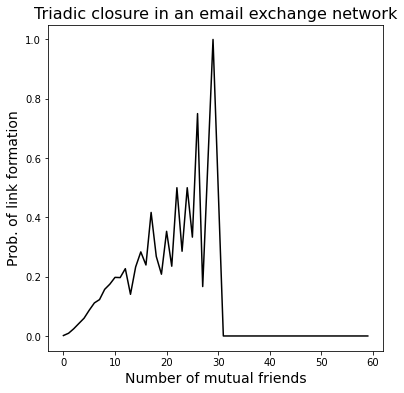

In [15]:
# prep data for plot
k = list(k_tk_dict.keys())
tk = list(k_tk_dict.values())
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Number of mutual friends', size = 14)
ax.set_ylabel('Prob. of link formation', size = 14)
ax.set_title('Triadic closure in an email exchange network', size = 16)
ax.plot(k, tk, color = 'black')
plt.show()

# Run the algorithm on the whole dataset using rolling basis

<img src="rolling_window.jpg" alt="Drawing" style="width: 600px;"/>

In [ ]:
def kossinets_watts_rolling_average(data):
    # the rolling use a period of 100 days (1 day = 86400 sec)
    max_t = math.floor(max(data['timestamp']) / (86400*100))
    # however, after exploring the data, it does not seem relevant after t = 5
    max_t = 5
    # get 100 days value
    day_100 = 86400*100
    # initiate df to store data
    df = pd.DataFrame()
    data[data['timestamp'] < 8640000]
    for t in tqdm(range(max_t-1)):
        snap1 = data[data['timestamp'] < (t+1)*day_100]
        # sort by source, target
        snap1.sort_values(by = ['source', 'target'], ascending = True, inplace = True)

        snap2 = data[data['timestamp'] < (t+2)*day_100]
        # sort by source, target
        snap2.sort_values(by = ['source', 'target'], ascending = True, inplace = True)
    
        snap1_result, snap1_structure = kossinets_watts(snap1)
        snap2_result, snap2_structure = kossinets_watts(snap2)
        
        new_tie_formed = get_added_ties(snap1_structure, snap2_structure)
        
        # get prob
        total_prob = {}
        # get total of nodes by mutual ties
        for node in snap1_result:
            for mutual in snap1_result[node]:
                num_node = len(snap1_result[node][mutual])
                if mutual in total_prob.keys():
                    total_prob[mutual] = total_prob[mutual] + num_node
                else:
                    total_prob[mutual] = num_node

        edge_form_prob = {}
        for node in new_tie_formed:
            for tie in new_tie_formed[node]:
                for k in snap1_result[node]:
                    if tie in snap1_result[node][k]:
                        if k in edge_form_prob.keys():
                            edge_form_prob[k] = edge_form_prob[k] + 1
                        else:
                            edge_form_prob[k] = 1
        
        # get k-t(k) dict for visualization
        k_tk_dict = {}
        for k in sorted(total_prob.keys()):
            if k not in edge_form_prob.keys():
                edge_form_prob[k] = 0
            k_tk_dict[k] = edge_form_prob[k] / total_prob[k]
        temp_df = pd.DataFrame.from_dict(k_tk_dict, orient='index', columns = ['tk'])
        # merge df
        df = pd.merge(df, temp_df, left_index = True, right_index = True, how = 'outer')
        df = pd.DataFrame(df.mean(axis = 1), columns = ['tk_bar'])
    return df